# Home Credit Default Risk (HCDR)

This project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [0]:
!pwd


/content


In [0]:
# !mkdir ~/.kaggle
# !cp /root/shared/Downloads/kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Place holder to add Kaggle API details
import os
os.environ['KAGGLE_USERNAME'] = 'garashah'
os.environ['KAGGLE_KEY'] = '9a0b6249aa6153c916d1b05be3fd8390' 

In [0]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
application_train.csv               158MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

![alt text](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [0]:
#Uncomment if needed
#USERNAME: AppliedMLgroup9@gmail.com
#PASSWORD: catsarecool
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
DATA_DIR = '/content/credit_data/'

In [0]:
#DATA_DIR = "/content/credit_data/" # Changed directory to adjust with Google Colab environment 
# !ls > /content/gdrive/
!mv "Data/credit_data" /content/

In [0]:
!mkdir -p $DATA_DIR

In [0]:
!ls -l $DATA_DIR

total 705164
-rw-r--r-- 1 root root   6091687 Apr 19 15:38 application_test.csv.zip
-rw-r--r-- 1 root root  37847529 Apr 19 15:38 application_train.csv.zip
-rw-r--r-- 1 root root  59574401 Apr 19 15:38 bureau_balance.csv.zip
-rw-r--r-- 1 root root  38550359 Apr 19 15:38 bureau.csv.zip
-rw-r--r-- 1 root root 101435187 Apr 19 15:38 credit_card_balance.csv.zip
-rw-r--r-- 1 root root     37383 Apr 19 15:38 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 284147164 Apr 19 15:38 installments_payments.csv.zip
-rw-r--r-- 1 root root 113882235 Apr 19 15:38 POS_CASH_balance.csv.zip
-rw-r--r-- 1 root root  79962533 Apr 19 15:38 previous_application.csv.zip
-rw-r--r-- 1 root root    536202 Apr 19 15:38 sample_submission.csv


In [0]:
#!if [ ! -d "/content/credit_data/" ]; then kaggle competitions download home-credit-default-risk -p $DATA_DIR; fi
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 15.4MB/s]
 86% 5.00M/5.81M [00:00<00:00, 26.4MB/s]
100% 5.81M/5.81M [00:00<00:00, 28.4MB/s]
 98% 36.0M/36.8M [00:00<00:00, 25.8MB/s]
100% 36.8M/36.8M [00:00<00:00, 62.6MB/s]
 89% 97.0M/109M [00:01<00:00, 42.3MB/s]
100% 109M/109M [00:01<00:00, 64.4MB/s] 
 84% 81.0M/96.7M [00:01<00:00, 31.4MB/s]
100% 96.7M/96.7M [00:01<00:00, 59.0MB/s]
100% 271M/271M [00:05<00:00, 42.8MB/s]

 90% 69.0M/76.3M [00:01<00:00, 40.0MB/s]
100% 76.3M/76.3M [00:01<00:00, 60.7MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 73.2MB/s]
 76% 43.0M/56.8M [00:00<00:00, 30.4MB/s]
100% 56.8M/56.8M [00:00<00:00, 65.0MB/s]
 83% 30.0M/36.1M [00:00<00:00, 14.0MB/s]
100% 36.1M/36.1M [00:00<00:00, 49.4MB/s]


In [0]:
!ls -ltr $DATA_DIR
# !ls /content/gdrive/

total 705164
-rw-r--r-- 1 root root     37383 Apr 19 15:38 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root  38550359 Apr 19 15:38 bureau.csv.zip
-rw-r--r-- 1 root root    536202 Apr 19 15:38 sample_submission.csv
-rw-r--r-- 1 root root 101435187 Apr 19 15:38 credit_card_balance.csv.zip
-rw-r--r-- 1 root root 284147164 Apr 19 15:38 installments_payments.csv.zip
-rw-r--r-- 1 root root  37847529 Apr 19 15:38 application_train.csv.zip
-rw-r--r-- 1 root root  59574401 Apr 19 15:38 bureau_balance.csv.zip
-rw-r--r-- 1 root root   6091687 Apr 19 15:38 application_test.csv.zip
-rw-r--r-- 1 root root  79962533 Apr 19 15:38 previous_application.csv.zip
-rw-r--r-- 1 root root 113882235 Apr 19 15:38 POS_CASH_balance.csv.zip


### Imports

In [0]:
import numpy as np
import pandas as pd 
from time import time
import os as os
import gc as gc
import glob as glob
import re as re
import zipfile as zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from joblib import Memory
from scipy import stats
import json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

def pct(x):
    return round(100*x,3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# csvs = glob.glob(DATA_DIR+'/*.csv')
# if(len(csvs) == 0):
unzippingReq = True
if unzippingReq: #please modify this code  
    zip_ref = zipfile.ZipFile('/content/credit_data/application_train.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('/content/credit_data/application_test.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('/content/credit_data/bureau_balance.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('/content/credit_data/bureau.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('/content/credit_data/credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('/content/credit_data/installments_payments.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('/content/credit_data/POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('/content/credit_data/previous_application.csv.zip', 'r')
    zip_ref.extractall('/content/credit_data')
    zip_ref.close()

In [0]:
!ls -l $DATA_DIR

ls: cannot access '/credit_data/': No such file or directory


In [0]:
%%time
datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 37 s, sys: 2.13 s, total: 39.1 s
Wall time: 39.1 s


In [0]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

Application_train and application_test at a glance:

In [0]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [0]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,...,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,...,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,11.462889,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.205142,0.181278,0.189498,0.113112,0.081536,0.049318,0.113188,0.082868,0.139164,0.100669,0.147361,0.164976,...,0.100931,0.147629,0.165241,0.082869,0.099737,0.116503,0.048148,0.072998,0.111420,3.608053,0.514413,3.580125,0.403791,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,

In [0]:
datasets["application_train"].describe(include='all') #categorical and numerical

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reg oper account,block of flats,NaN,Panel,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,248526,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55186,NaN,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73830,150503,NaN,66040,159428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,...,0.101954,0.108607,0.008651,0.028236,NaN,NaN,0.

### Missing data for application train

In [0]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MEDI,68.35,210199
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199


### Missing data for application test

In [0]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_MEDI,68.72,33495
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
NONLIVINGAPARTMENTS_AVG,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780


Categories with 60-70% missing data are unlikely to be helpful in feature selection. Columns that meet this threshold are safe to drop.

### Correlations

With so much data, let's first see what the highest correlated categories are, positive or negative, with respect to TARGET.

In [0]:
corr = datasets["application_train"].corr()['TARGET'].sort_values()

In [0]:
corr.head(20)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
TOTALAREA_MODE               -0.032596
ELEVATORS_MODE               -0.032131
LIVINGAREA_MODE              -0.030685
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64

Most negative correlations:

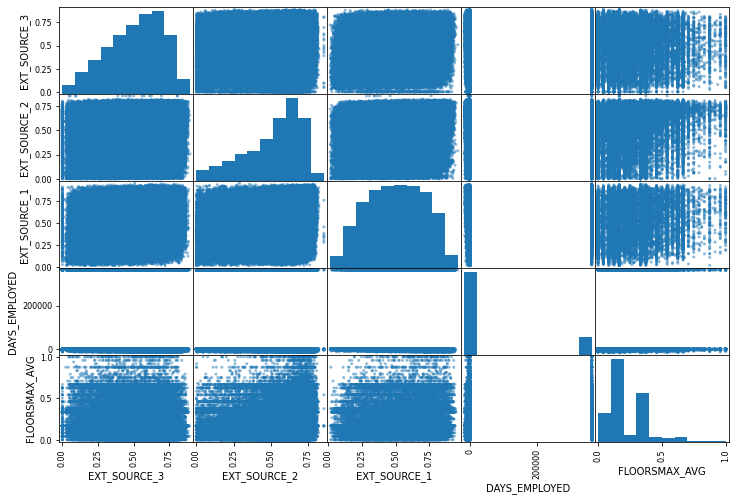

In [0]:
neg_attributes = ["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "DAYS_EMPLOYED", "FLOORSMAX_AVG"]
scatter_matrix(datasets["application_train"][neg_attributes], figsize=(12, 8));

In [0]:
corr.tail(20)

OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

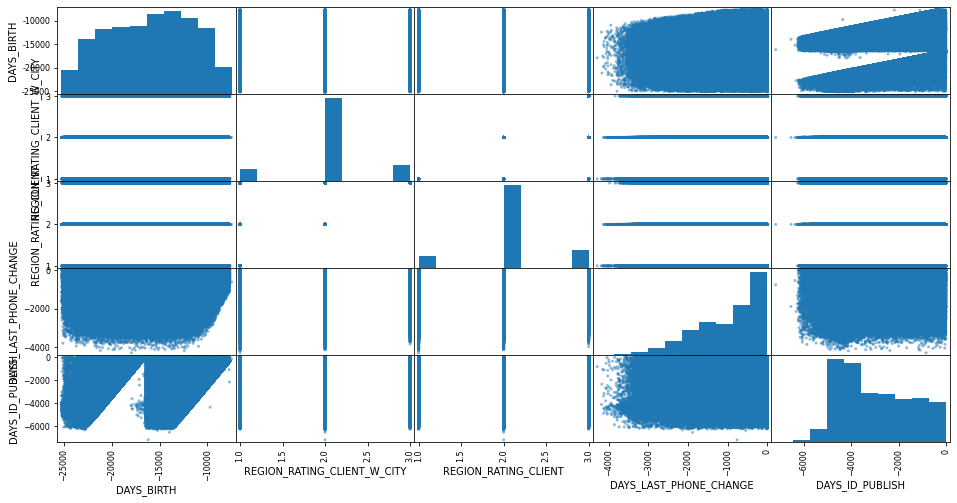

In [0]:
pos_attributes = ["DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT", "DAYS_LAST_PHONE_CHANGE", "DAYS_ID_PUBLISH"]
scatter_matrix(datasets["application_train"][pos_attributes], figsize=(16, 8));

### Distribution of Applicant Ages

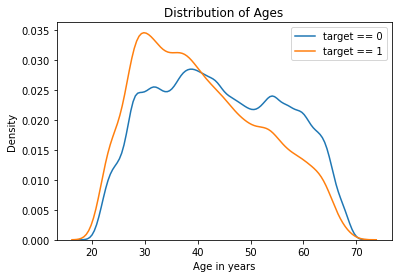

In [0]:
plt.figure(figsize = (6, 4)) 
sns.kdeplot(np.abs(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 0, 'DAYS_BIRTH'] / 365), label = 'target == 0')
sns.kdeplot(np.abs(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 1, 'DAYS_BIRTH'] / 365), label = 'target == 1')
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Judging from this kernel density plot, younger applicants are more likely to default.

### Days Employed

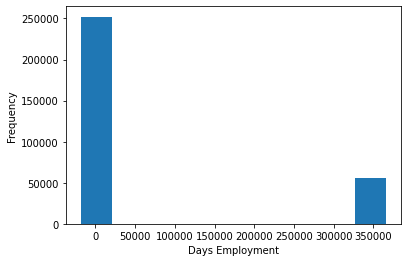

In [0]:
plt.figure(figsize = (6, 4)) 
datasets["application_train"]['DAYS_EMPLOYED'].plot.hist();
plt.xlabel('Days Employment');

Applicants with fewer days of employment are less likely to repay.

### Applicants occupations

In [0]:
def quick_plot(category,label_rotation=False,horizontal_layout=True):

    app_train = datasets['application_train']
    tmp = app_train[category].value_counts()
    
    df1 = pd.DataFrame({category: tmp.index,'Number of contracts': tmp.values})

    cat_perc = app_train[[category, 'TARGET']].groupby([category],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("dark")
    s = sns.barplot(ax=ax1, x = category, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = category, y='TARGET', order=cat_perc[category], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target 1', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

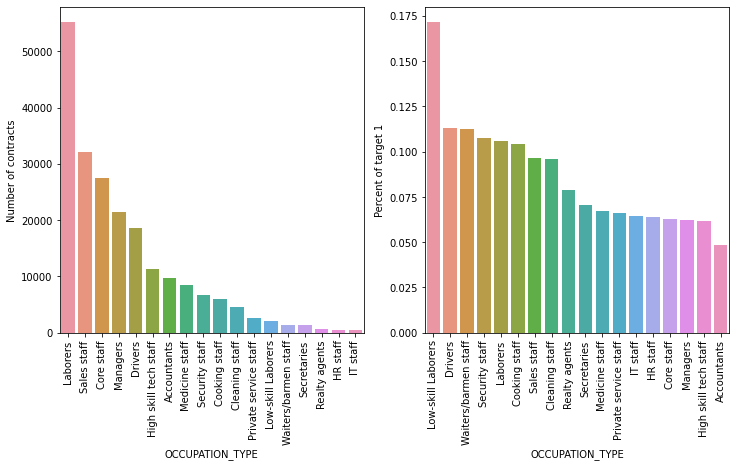

In [0]:
quick_plot('OCCUPATION_TYPE', True)

Laborers make for the most applicants to apply for loans.

### Phase 2 EDA

#### Applicant Gender

What is the gender distribution of applicants? Does one fail to repay more than the other?

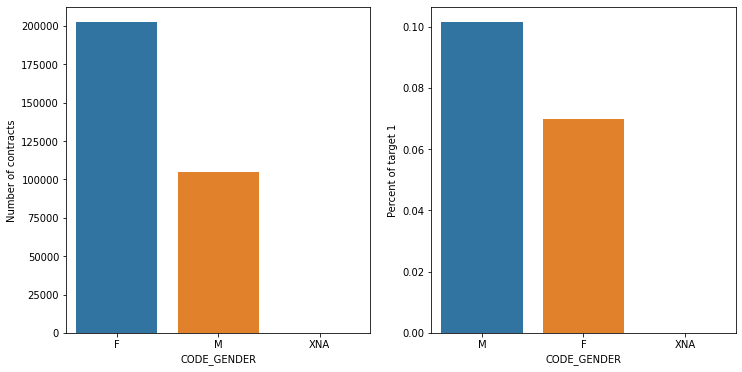

In [0]:
quick_plot('CODE_GENDER')

While the number of female applications is nearly double, males are more likely to fault on their loan.

#### Family Size of Applicant

How does family size vary amongst applicants?

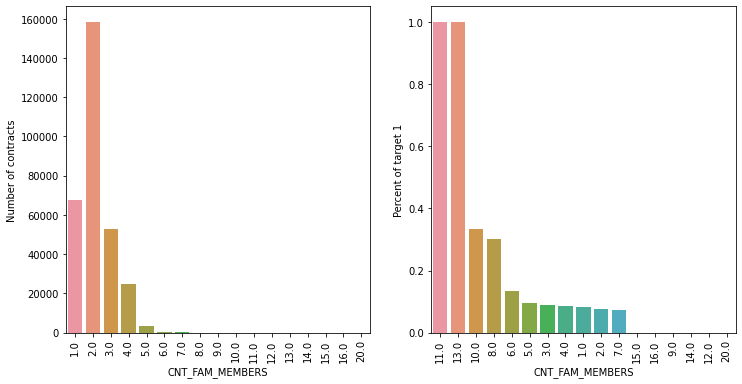

In [0]:
quick_plot('CNT_FAM_MEMBERS',True)

Applicants with family members of 2 are most numerous.  Applicants with family members more than 10 nearly all default.

#### Number of Children

What is the distribution of children among applicants?

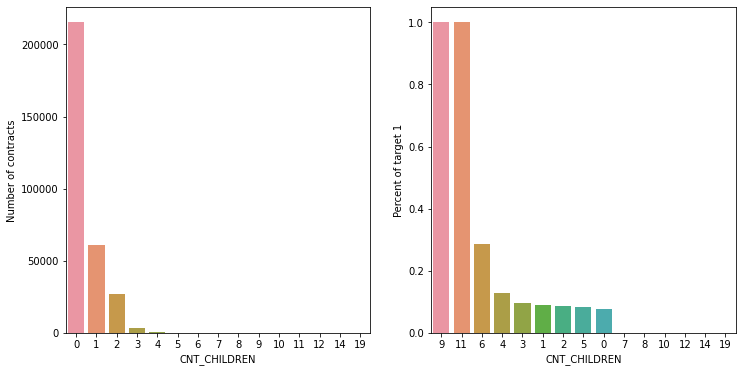

In [0]:
quick_plot('CNT_CHILDREN')

The majority of applicants have no children and the ones that do have very few. The applicants with more children are more likely to default.  Children are pricey it seems.

#### Annuity Distribution

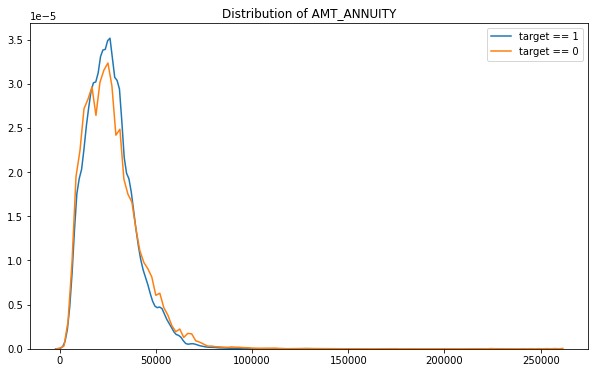

In [0]:
def plot_dist(category):
    app_train = datasets['application_train']
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % category)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, category], label = 'target == 1')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, category], label = 'target == 0')
plot_dist('AMT_ANNUITY')

#### Credit Distribution

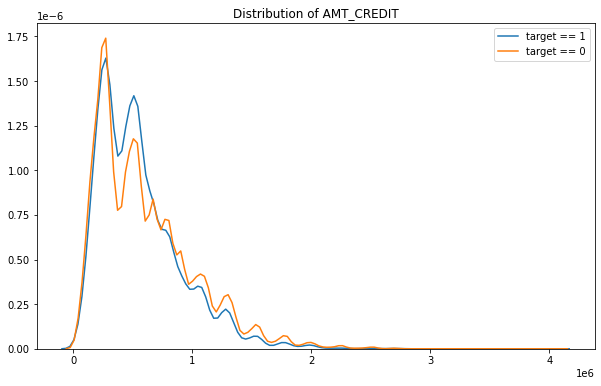

In [0]:
plot_dist('AMT_CREDIT')

#### Total Income

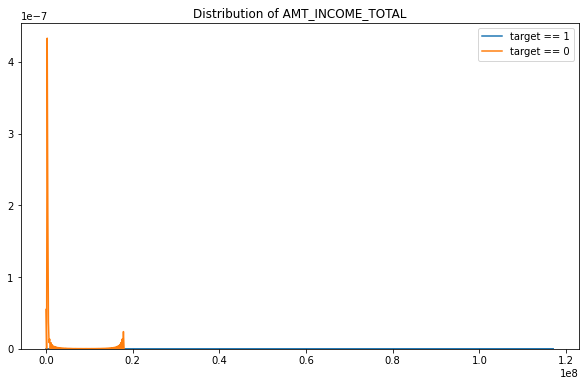

In [0]:
plot_dist('AMT_INCOME_TOTAL')

### Bureau Balance

There is no missing data in Bureau Balance

In [0]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_bureau_balance_data.head()

,Percent,Missing Count
STATUS,0.0,0
MONTHS_BALANCE,0.0,0
SK_ID_BUREAU,0.0,0


**EDA for MONTHS_BALANCE	and STATUS** 
1.   MONTHS_BALANCE - The plotted data suggests that maximum month balance data for previous loans falls between 0 to 60 days
2.   STATUS - The plotted data shows maximum previous credit bureau loans are closed (c) for that month or there are no Days past due (DPD)



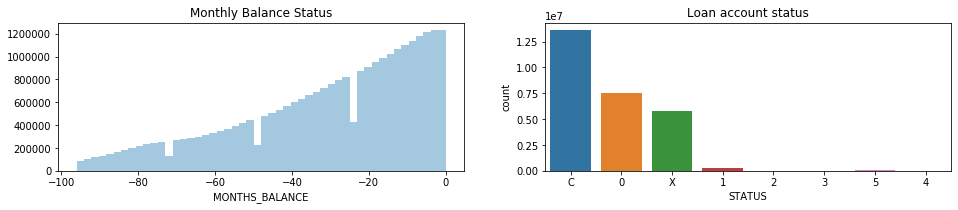

In [0]:
plt.figure(figsize = (16,6))

plt.subplot(221)
plt.title('Monthly Balance Status')
sns.distplot(datasets["bureau_balance"]["MONTHS_BALANCE"], kde=False);

plt.subplot(222)
plt.title('Loan account status')
sns.countplot(x='STATUS', data=datasets["bureau_balance"]);

### Bureau

Missing data report shows that two featurs AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE have more than 60% missing data which can be considered dropping

In [0]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_bureau_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_bureau_data.head()

,Percent,Missing Count
AMT_ANNUITY,71.47,1226791
AMT_CREDIT_MAX_OVERDUE,65.51,1124488
DAYS_ENDDATE_FACT,36.92,633653
AMT_CREDIT_SUM_LIMIT,34.48,591780
AMT_CREDIT_SUM_DEBT,15.01,257669


**EDA for CREDIT_CURRENCY	and CREDIT_ACTIVE** 
1.   CREDIT_CURRENCY - Majority of previous credit bureau loans belongs to Currency type 1
2.   CREDIT_ACTIVE - The plotted data shows previous credit bureau loans are closed which is good sign. Few of them are active or sold


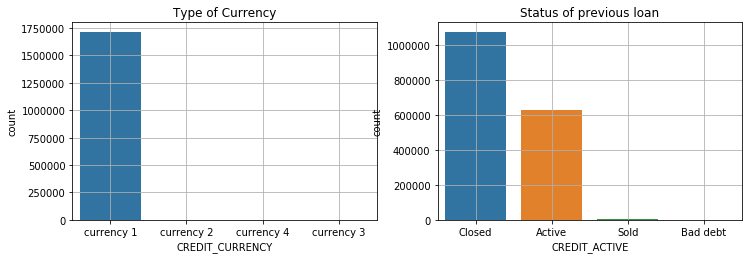

In [0]:
plt.figure(figsize = (12,8))

plt.subplot(221)
plt.title('Type of Currency')
sns.countplot(x='CREDIT_CURRENCY', data=datasets["bureau"]);
plt.grid(True)

plt.subplot(222)
plt.title('Status of previous loan')
sns.countplot(x='CREDIT_ACTIVE', data=datasets["bureau"]);
plt.grid(True)

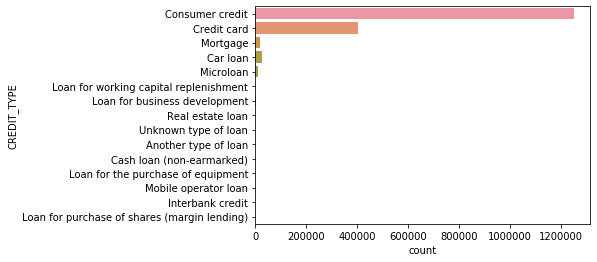

In [0]:
sns.countplot(y='CREDIT_TYPE', data=datasets["bureau"], orient="v");

## Cody - Installments_Payments, Credit_Card_Balance

### Credit Card Balance

We have to figure out an aggregation technique so that this data can be joined to the test and training data. Some of the columns make sense for aggregation, while others do not. For example agregating the credit card balance makes sense, while aggregating the month of the balance is not. That is not to say that the column relating to the month of the balance is not useful, it could be used in feature engineering to get information from the most recent months.

In some cases, it might be beneficial to use multiple different aggregation methods on one column.

In [0]:
sum_cols = ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
            'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
            'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']

mean_sum_max_cols = ['SK_DPD', 'SK_DPD_DEF']

sum_mean_cols = ['AMT_BALANCE', "AMT_CREDIT_LIMIT_ACTUAL"]

count_cols = ['SK_ID_CURR']

agg_op_features = {}

for f in sum_cols:
    agg_op_features[f] = 'sum'

for f in mean_sum_max_cols:
    agg_op_features[f] = ['mean', 'sum', 'max']
    
for f in sum_mean_cols:
    agg_op_features[f] = ['mean', 'sum']

for f in count_cols:
    agg_op_features[f] = 'count'
        
cc_bal = datasets["credit_card_balance"][datasets["credit_card_balance"]['NAME_CONTRACT_STATUS'] != 'Refused'].groupby('SK_ID_CURR').agg(agg_op_features)
cc_bal.columns = cc_bal.columns.map('_'.join)
cc_bal.head()

,AMT_DRAWINGS_ATM_CURRENT_sum,AMT_DRAWINGS_CURRENT_sum,AMT_DRAWINGS_OTHER_CURRENT_sum,AMT_DRAWINGS_POS_CURRENT_sum,AMT_INST_MIN_REGULARITY_sum,AMT_PAYMENT_CURRENT_sum,AMT_PAYMENT_TOTAL_CURRENT_sum,AMT_RECEIVABLE_PRINCIPAL_sum,AMT_RECIVABLE_sum,AMT_TOTAL_RECEIVABLE_sum,...,SK_DPD_sum,SK_DPD_max,SK_DPD_DEF_mean,SK_DPD_DEF_sum,SK_DPD_DEF_max,AMT_BALANCE_mean,AMT_BALANCE_sum,AMT_CREDIT_LIMIT_ACTUAL_mean,AMT_CREDIT_LIMIT_ACTUAL_sum,SK_ID_CURR_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,...,0,0,0.000000,0,0,0.000000,0.000,270000.000000,1620000,6
100011,180000.0,180000.0,0.0,0.0,288804.195,358386.75,334485.000,3877754.580,4028055.255,4028055.255,...,0,0,0.000000,0,0,54482.111149,4031676.225,164189.189189,12150000,74
100013,571500.0,571500.0,0.0,0.0,129454.020,688161.24,654448.545,1656533.745,1737703.665,1737703.665,...,1,1,0.010417,1,1,18159.919219,1743352.245,131718.750000,12645000,96
100021,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,...,0,0,0.000000,0,0,0.000000,0.000,675000.000000,11475000,17
100023,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,...,0,0,0.000000,0,0,0.000000,0.000,135000.000000,1080000,8


In [0]:
cc_bal.columns

Index(['AMT_DRAWINGS_ATM_CURRENT_sum', 'AMT_DRAWINGS_CURRENT_sum',
       'AMT_DRAWINGS_OTHER_CURRENT_sum', 'AMT_DRAWINGS_POS_CURRENT_sum',
       'AMT_INST_MIN_REGULARITY_sum', 'AMT_PAYMENT_CURRENT_sum',
       'AMT_PAYMENT_TOTAL_CURRENT_sum', 'AMT_RECEIVABLE_PRINCIPAL_sum',
       'AMT_RECIVABLE_sum', 'AMT_TOTAL_RECEIVABLE_sum',
       'CNT_DRAWINGS_ATM_CURRENT_sum', 'CNT_DRAWINGS_CURRENT_sum',
       'CNT_DRAWINGS_OTHER_CURRENT_sum', 'CNT_DRAWINGS_POS_CURRENT_sum',
       'CNT_INSTALMENT_MATURE_CUM_sum', 'SK_DPD_mean', 'SK_DPD_sum',
       'SK_DPD_max', 'SK_DPD_DEF_mean', 'SK_DPD_DEF_sum', 'SK_DPD_DEF_max',
       'AMT_BALANCE_mean', 'AMT_BALANCE_sum', 'AMT_CREDIT_LIMIT_ACTUAL_mean',
       'AMT_CREDIT_LIMIT_ACTUAL_sum', 'SK_ID_CURR_count'],
      dtype='object')

What percentage of applicants had a late payment?

In [0]:
np.round(100 * len(cc_bal[cc_bal['SK_DPD_sum'] > 1]) / len(cc_bal), 2)

16.41

What percentage of applicants had late payments when we account for a tolerance based on low loan amounts?

In [0]:
np.round(100 * len(cc_bal[cc_bal['SK_DPD_DEF_sum'] > 1]) / len(cc_bal), 2)

12.72

Next it would be good to look at the distribution of balances carried by the applicants.

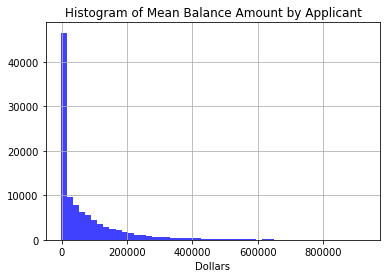

In [0]:
n, bins, patches = plt.hist(cc_bal['AMT_BALANCE_mean'], 50, facecolor='blue', alpha=0.75)
plt.title('Histogram of Mean Balance Amount by Applicant')
plt.xlabel("Dollars")
plt.grid(True)
plt.show()

It seems possible that plotting the histogram on a standard scale isn't showing some of the data, so we can try with the log scale.

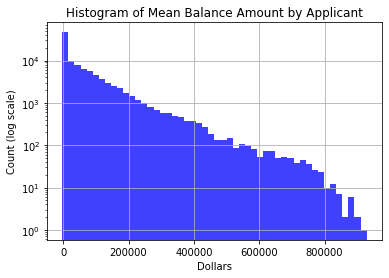

In [0]:
n, bins, patches = plt.hist(cc_bal['AMT_BALANCE_mean'], 50, facecolor='blue', alpha=0.75, log = True)
plt.title('Histogram of Mean Balance Amount by Applicant')
plt.xlabel("Dollars")
plt.ylabel("Count (log scale)")
plt.grid(True)
plt.show()

From this we can see that there is a wide variety of mean balances carried by applicants. This could definitely be something to compare with the amount of the loan being requested to create a feature for our model.

Next, we can try to surmise some idea of the interest rate being paid on the credit cards for these applicants. While some payments might be made on time, we would expect the interest rate to be 0. So when we look at the mean interest rate paid by applicant, it wont be the true interest rate that is on the credit card, but could provide insight. Also this measure is just the percentage of the recievable amount paid that is attributed to the principal of the balance.

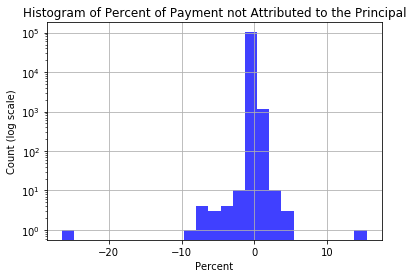

In [0]:
int_rate = (cc_bal['AMT_TOTAL_RECEIVABLE_sum'] - cc_bal['AMT_RECEIVABLE_PRINCIPAL_sum'])/cc_bal['AMT_TOTAL_RECEIVABLE_sum']
int_rate  = int_rate.fillna(0)
n, bins, patches = plt.hist(int_rate, 25, facecolor='blue', alpha=0.75, log = True)
plt.title('Histogram of Percent of Payment not Attributed to the Principal')
plt.xlabel("Percent")
plt.ylabel("Count (log scale)")
plt.grid(True)
plt.show()

Interestingly we see some of the data seems to suggest that there were overpayments of the account.

Next we can see how much more or less people are paying in comparison to the minimum monthly payment

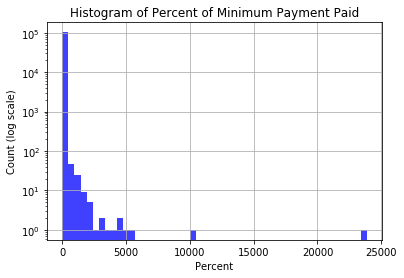

In [0]:
min_pay = (cc_bal['AMT_PAYMENT_TOTAL_CURRENT_sum'] - cc_bal['AMT_INST_MIN_REGULARITY_sum'])/cc_bal['AMT_INST_MIN_REGULARITY_sum']
min_pay = min_pay.fillna(0)
min_pay[np.isinf(min_pay)] = 0
n, bins, patches = plt.hist(min_pay, 50, facecolor='blue', alpha=0.75, log = True)
plt.title('Histogram of Percent of Minimum Payment Paid')
plt.xlabel("Percent")
plt.ylabel("Count (log scale)")
plt.grid(True)
plt.show()

As we are filling infinite values with 0s that come from our minimum payment being 0, we get a large amount of 0 values, but we also get some values that are representative of card holders paying much more than the minimum required.

Next, we can look at the credit limit utilization of the card holders. 

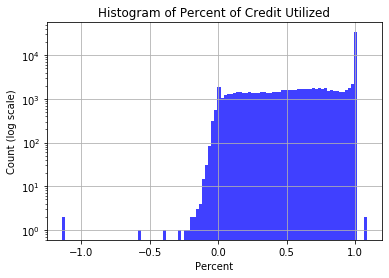

In [0]:
credit_use = (cc_bal['AMT_CREDIT_LIMIT_ACTUAL_sum'] - cc_bal['AMT_BALANCE_sum'])/cc_bal['AMT_CREDIT_LIMIT_ACTUAL_sum']
credit_use = credit_use.fillna(0)
credit_use[np.isneginf(credit_use)] = 0
n, bins, patches = plt.hist(credit_use, 100, facecolor='blue', alpha=0.75, log = True)
plt.title('Histogram of Percent of Credit Utilized')
plt.xlabel("Percent")
plt.ylabel("Count (log scale)")
plt.grid(True)
plt.show()

In this case we see some negative percentages, meaning that the months balance is greater than the credit limit. For the most part though, we see an extremely large amount of cases where the balance is very close to the credit limit. If the card holders didn't use their entire credit limit, it seems as though the rest of the percentages of usage are all equally distributed.

### Credit Card Balance: Phase 2 EDA

To start off with, we can look at the total number of payments made by each applicant.

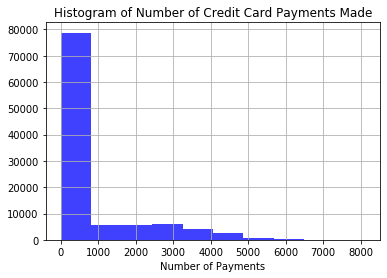

In [0]:
n, bins, patches = plt.hist(cc_bal['CNT_INSTALMENT_MATURE_CUM_sum'], 10, facecolor='blue', alpha=0.75)
plt.title('Histogram of Number of Credit Card Payments Made')
plt.xlabel("Number of Payments")
plt.grid(True)
plt.show()

A large majority of the applicants had less than 1000 overall payments in history, but there is a group that have higher than 1000 payments. In some cases, some of the applicants have many more payments than others. This could show reliability as being able to make 5000 payments on credit cards should be looked at as much more reliable than say 100 credit card payments.

Next we can look at the one categorical column in this data which is contract status

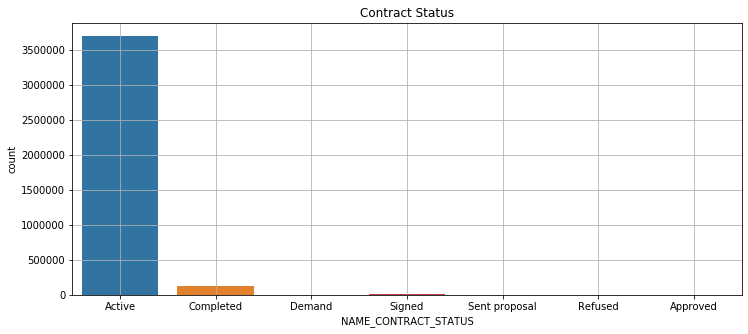

In [0]:
plt.figure(figsize = (12,5))
plt.title('Contract Status')
sns.countplot(x=datasets["credit_card_balance"]['NAME_CONTRACT_STATUS'])
plt.grid(True)

The reason in phase 1 that we just used this column to filter out certain rows that were "refused" contract status, is because there isn't much variability in this column and therefore likely isn't a good predictor.

### Installment Payments

When it comes to aggregation of this set we have the following columns that we have to figure out how to aggregate. Much like what was done with the credit card balances data, aggregation of this data will be based upon both mean and sum, along with adding a count of how many installment payments were made by each applicant.

In [0]:
sum_mean_cols = ['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']

count_cols = ['SK_ID_CURR']

agg_op_features = {}

for f in sum_mean_cols:
    agg_op_features[f] = ['mean', 'sum']

for f in count_cols:
    agg_op_features[f] = 'count'
        
ip_ag = datasets['installments_payments'].groupby('SK_ID_CURR').agg(agg_op_features)
ip_ag.columns = ip_ag.columns.map('_'.join)
ip_ag.head()

,DAYS_INSTALMENT_mean,DAYS_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_mean,DAYS_ENTRY_PAYMENT_sum,AMT_INSTALMENT_mean,AMT_INSTALMENT_sum,AMT_PAYMENT_mean,AMT_PAYMENT_sum,SK_ID_CURR_count
SK_ID_CURR,,,,,,,,,
100001,-2187.714286,-15314.0,-2195.000000,-15365.0,5885.132143,41195.925,5885.132143,41195.925,7
100002,-295.000000,-5605.0,-315.421053,-5993.0,11559.247105,219625.695,11559.247105,219625.695,19
100003,-1378.160000,-34454.0,-1385.320000,-34633.0,64754.586000,1618864.650,64754.586000,1618864.650,25
100004,-754.000000,-2262.0,-761.666667,-2285.0,7096.155000,21288.465,7096.155000,21288.465,3
100005,-586.000000,-5274.0,-609.555556,-5486.0,6240.205000,56161.845,6240.205000,56161.845,9


There aren't a lot of columns in the installment payment dataset, from this data we are most interested in when the holders of loans paid their loan in regards to when it was due, and how much they paid in regards to how much they were supposed to pay. 

One thing we can look at is how the distributions change depending on the aggregation method: sum or mean. The first set of graphs is sum. So the x-axis might look like a large number but it is the sum of each row for a particular loan holder. Also we take the absolute value as this number is held as a negative number.

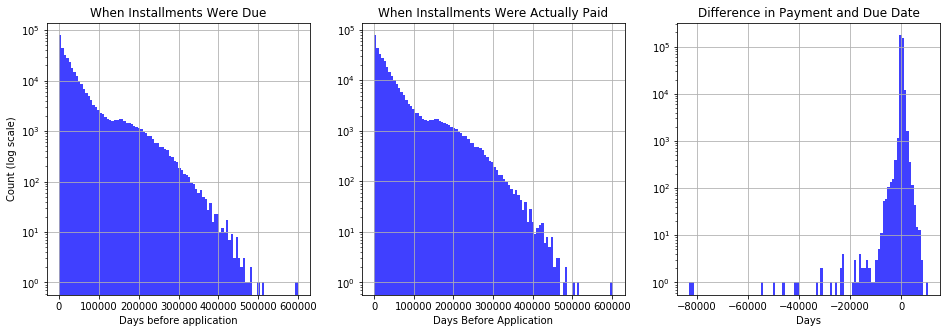

In [0]:
plt.figure(figsize = (16,5))
plt.subplot(131)
n, bins, patches = plt.hist(np.abs(ip_ag['DAYS_INSTALMENT_sum']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('When Installments Were Due')
plt.xlabel("Days before application")
plt.ylabel("Count (log scale)")
plt.grid(True)
plt.subplot(132)
n, bins, patches = plt.hist(np.abs(ip_ag['DAYS_ENTRY_PAYMENT_sum']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('When Installments Were Actually Paid')
plt.xlabel("Days Before Application")
plt.grid(True)
plt.subplot(133)
n, bins, patches = plt.hist(np.abs(ip_ag['DAYS_ENTRY_PAYMENT_sum']) - np.abs(ip_ag['DAYS_INSTALMENT_sum']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('Difference in Payment and Due Date')
plt.xlabel("Days")
plt.grid(True)

With this calculation, greater than 0 in the difference in days means they paid early, and less than 0 means they paid late.

Next we can look at aggregating this by mean instead of sum.

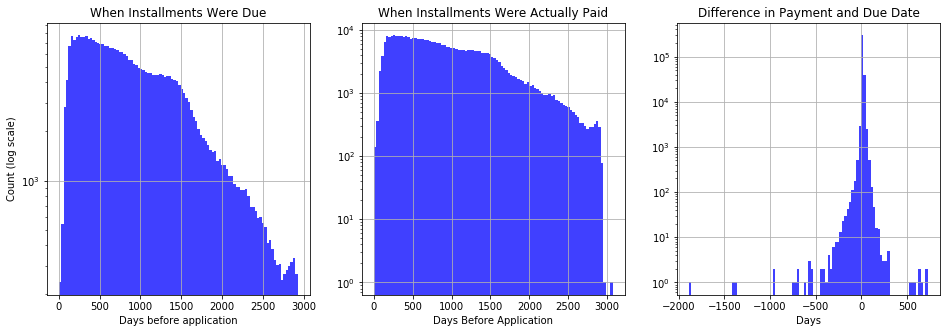

In [0]:
plt.figure(figsize = (16,5))
plt.subplot(131)
n, bins, patches = plt.hist(np.abs(ip_ag['DAYS_INSTALMENT_mean']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('When Installments Were Due')
plt.xlabel("Days before application")
plt.ylabel("Count (log scale)")
plt.grid(True)
plt.subplot(132)
n, bins, patches = plt.hist(np.abs(ip_ag['DAYS_ENTRY_PAYMENT_mean']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('When Installments Were Actually Paid')
plt.xlabel("Days Before Application")
plt.grid(True)
plt.subplot(133)
n, bins, patches = plt.hist(np.abs(ip_ag['DAYS_ENTRY_PAYMENT_mean']) - np.abs(ip_ag['DAYS_INSTALMENT_mean']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('Difference in Payment and Due Date')
plt.xlabel("Days")
plt.grid(True)

When we aggregate by mean, we see that overall more people paid late based on this aggregation rather than sum. So which is correct? Well the sum aggregation can cancel itself out, say if someone pays early by 10 days on one installment and late by 10 days, the sum aggregation would show no late payments. Due to this, features should likely be engineered to get the days late before the aggregation of the table instead of after. This is likely also true for the payment amount versus the amount due, for the prediction model, we can try to use both as predictors and see which win in feature selection.

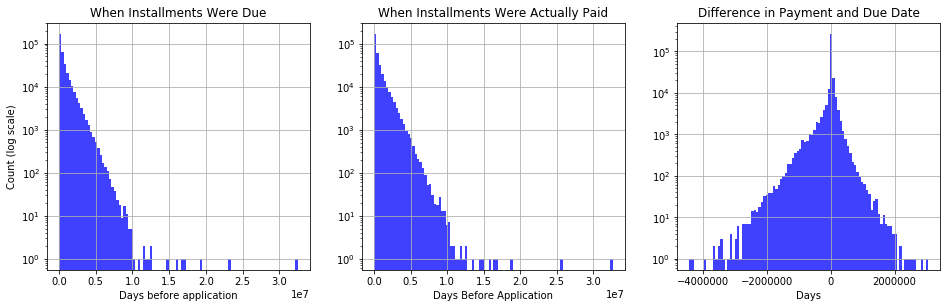

In [0]:
plt.figure(figsize = (16,10))
plt.subplot(231)
n, bins, patches = plt.hist(np.abs(ip_ag['AMT_INSTALMENT_sum']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('When Installments Were Due')
plt.xlabel("Days before application")
plt.ylabel("Count (log scale)")
plt.grid(True)
plt.subplot(232)
n, bins, patches = plt.hist(np.abs(ip_ag['AMT_PAYMENT_sum']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('When Installments Were Actually Paid')
plt.xlabel("Days Before Application")
plt.grid(True)
plt.subplot(233)
n, bins, patches = plt.hist(np.abs(ip_ag['AMT_INSTALMENT_sum']) - np.abs(ip_ag['AMT_PAYMENT_sum']), 100, facecolor='blue', alpha=0.75, log = True)
plt.title('Difference in Payment and Due Date')
plt.xlabel("Days")
plt.grid(True)

### Installment Payments: Phase 2 EDA

There is only one columns values to evaluate for this dataset. This column is just a count of the number of payments made by each applicant.

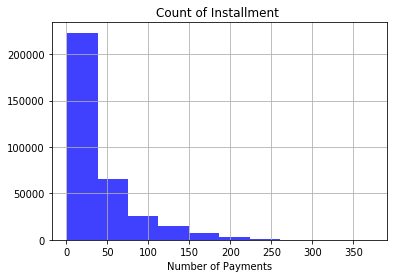

In [0]:
n, bins, patches = plt.hist(ip_ag['SK_ID_CURR_count'], 10, facecolor='blue', alpha=0.75)
plt.title('Count of Installment ')
plt.xlabel("Number of Payments")
plt.grid(True)
plt.show()

We see that the count of payments made in this file (installments vs. credit cards) is much more closely distributed. Most applicants have fewer payments, but even on the high end there are not a lot more payments than others. This might mean that this count of payments is less important.

### Installment Payments: Phase 3 EDA

One thing we can look at is how many late payments are made by each applicant. We can also categorize these late payments by how egregious they are. If they are 30 or more days late, that is more egregious than 1 and might be an indicator of someone who might not be a good person to give a loan. We can also see if the applicant has early payments, early payments might not be a indicitive of a good person to loan to as late payments are for someone not to loan to, but they might provide insight.

We will start by getting a count of how late the payment was or how early.

In [0]:
datasets['installments_payments']['Day_late'] = np.absolute(datasets['installments_payments']['DAYS_INSTALMENT']) - np.absolute(datasets['installments_payments']['DAYS_ENTRY_PAYMENT'])

In [0]:
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] > 0, 'HAS_LATE_PAYMENT'] = 1
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] <= 0, 'HAS_LATE_PAYMENT'] = 0
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] < 0, 'HAS_EARLY_PAYMENT'] = 1
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] >= 0, 'HAS_EARLY_PAYMENT'] = 0
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] > 29, 'HAS_30_LATE_PAYMENT'] = 1
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] <= 29, 'HAS_30_LATE_PAYMENT'] = 0
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] > 89, 'HAS_90_LATE_PAYMENT'] = 1
datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] <= 90, 'HAS_90_LATE_PAYMENT'] = 0
datasets['installments_payments'] = datasets['installments_payments'].fillna(0)

From the plot below we see that a large number of applicants do not have late payments, but we also have a skewed number in our target variable as well. That is, we have many people who didn't default and few who did, so maybe people who have late payments would be good indicators of the people who defaulted.

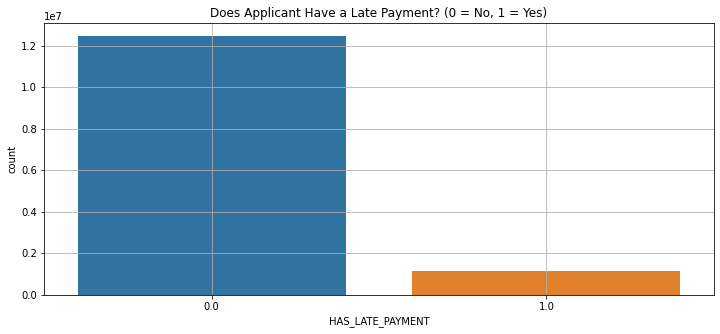

In [0]:
plt.figure(figsize = (12,5))
plt.title('Does Applicant Have a Late Payment? (0 = No, 1 = Yes)')
sns.countplot(x=datasets["installments_payments"]['HAS_LATE_PAYMENT'])
plt.grid(True)

We can look to see what the percentage is of people with late payments, and those with especially egregious late payments. 

In [0]:
late = len(datasets["installments_payments"].loc[datasets["installments_payments"]['HAS_LATE_PAYMENT'] == 1])
late

1146669

In [0]:
total = len(datasets["installments_payments"])
total

13605401

In [0]:
late/total

0.08428042657471103

In [0]:
late_30 = len(datasets["installments_payments"].loc[datasets["installments_payments"]['HAS_30_LATE_PAYMENT'] == 1])
late_30/total

0.00320475669919615

In [0]:
late_90 = len(datasets["installments_payments"].loc[datasets["installments_payments"]['HAS_90_LATE_PAYMENT'] == 1])
late_90/total

0.0009362458335480153

Again, a very small percentage of payments have egregious late payments, but maybe this is a great indicator of how they will handle further loans.

In [0]:
sum_mean_cols = ['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']

sum_cols = ['HAS_LATE_PAYMENT', 'HAS_30_LATE_PAYMENT', 'HAS_90_LATE_PAYMENT', 'HAS_EARLY_PAYMENT']

count_cols = ['SK_ID_CURR']

agg_op_features = {}

for f in sum_mean_cols:
    agg_op_features[f] = ['mean', 'sum']

for f in sum_cols:
    agg_op_features[f] = 'sum'
    
for f in count_cols:
    agg_op_features[f] = 'count'
        
ip_ag_late = datasets['installments_payments'].groupby('SK_ID_CURR').agg(agg_op_features)
ip_ag_late.columns = ip_ag_late.columns.map('_'.join)
ip_ag_late.head()

,DAYS_INSTALMENT_mean,DAYS_INSTALMENT_sum,DAYS_ENTRY_PAYMENT_mean,DAYS_ENTRY_PAYMENT_sum,AMT_INSTALMENT_mean,AMT_INSTALMENT_sum,AMT_PAYMENT_mean,AMT_PAYMENT_sum,HAS_LATE_PAYMENT_sum,HAS_30_LATE_PAYMENT_sum,HAS_90_LATE_PAYMENT_sum,HAS_EARLY_PAYMENT_sum,SK_ID_CURR_count
SK_ID_CURR,,,,,,,,,,,,,
100001,-2187.714286,-15314.0,-2195.000000,-15365.0,5885.132143,41195.925,5885.132143,41195.925,1.0,0.0,0.0,4.0,7
100002,-295.000000,-5605.0,-315.421053,-5993.0,11559.247105,219625.695,11559.247105,219625.695,0.0,0.0,0.0,19.0,19
100003,-1378.160000,-34454.0,-1385.320000,-34633.0,64754.586000,1618864.650,64754.586000,1618864.650,0.0,0.0,0.0,25.0,25
100004,-754.000000,-2262.0,-761.666667,-2285.0,7096.155000,21288.465,7096.155000,21288.465,0.0,0.0,0.0,3.0,3
100005,-586.000000,-5274.0,-609.555556,-5486.0,6240.205000,56161.845,6240.205000,56161.845,1.0,0.0,0.0,8.0,9


Once we aggregate the data, we can see how many late payments specific applicants have. Again, most of these applicants have no late payments, but many of the applicants do have multiple late payments.

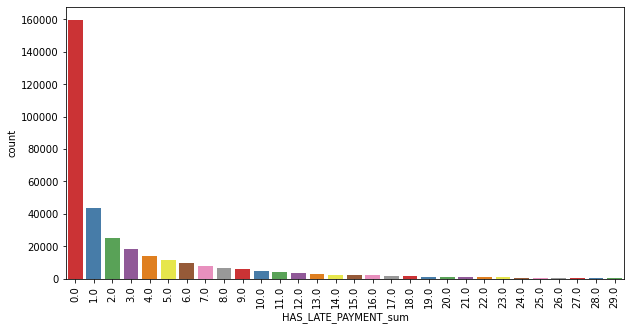

In [0]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=ip_ag_late[ip_ag_late['HAS_LATE_PAYMENT_sum'] < 30],
    x='HAS_LATE_PAYMENT_sum',
    palette='Set1'
)
chart_label = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

We can also see that many of the applicants do have many early payments from the plot below.

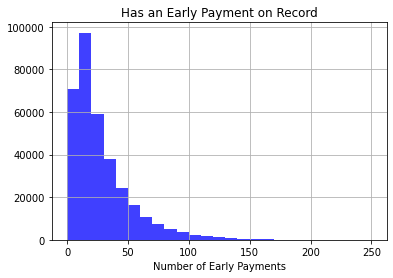

In [0]:
n, bins, patches = plt.hist(ip_ag_late['HAS_EARLY_PAYMENT_sum'], 25, facecolor='blue', alpha=0.75)
plt.title('Has an Early Payment on Record')
plt.xlabel("Number of Early Payments")
plt.grid(True)
plt.show()

### Previous Application
This dataset contains information regarding past applications for customers. This could indicate characteristics of loans that were rejected, leading to predictions of defaulting.

First, we want to know how many of the previous applications were approved, refused, or in another category. The chart below indicates that the majority were approved. Keeping all categories might be beneficial rather than aggregating into smaller groups, as canceled and unused offers indicate different outcomes.

Then the contract statuses were examined over client types, repeaters and non-repeaters. There seems to be more repeaters than non-repeaters (new customers). As a result, repeaters have a higher approval and refusal rate.


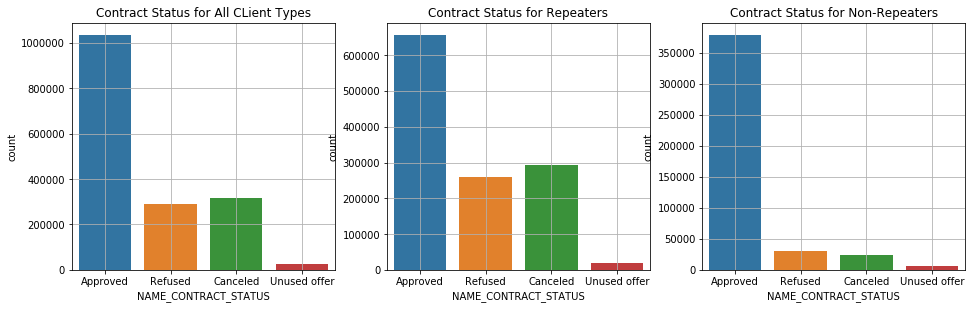

In [0]:
prev_app = datasets["previous_application"]
repeaters = prev_app[prev_app['NAME_CLIENT_TYPE'] == 'Repeater']
non_repeaters = prev_app[prev_app['NAME_CLIENT_TYPE'] != 'Repeater']

plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Contract Status for All CLient Types')
sns.countplot(x='NAME_CONTRACT_STATUS',data=datasets["previous_application"])
plt.grid(True)

plt.subplot(232)
plt.title('Contract Status for Repeaters')
sns.countplot(x='NAME_CONTRACT_STATUS',data=repeaters)
plt.grid(True)

plt.subplot(233)
plt.title('Contract Status for Non-Repeaters')
sns.countplot(x='NAME_CONTRACT_STATUS',data=non_repeaters)
plt.grid(True)

Next, we examined if repeating and new customers were rejected for similar reasons. The charts below indicate that the new and repeating customers are very similar. This combination may not contribute to significant predictions



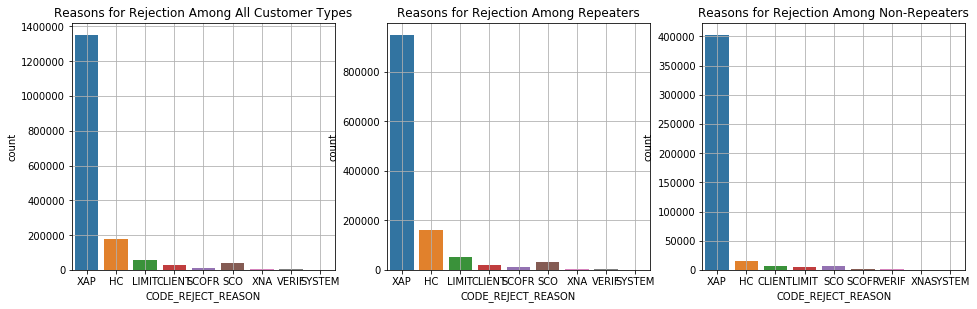

In [0]:
plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Reasons for Rejection Among All Customer Types')
sns.countplot(x='CODE_REJECT_REASON',data=prev_app)
plt.grid(True)

plt.subplot(232)
plt.title('Reasons for Rejection Among Repeaters')
sns.countplot(x='CODE_REJECT_REASON',data=repeaters)
plt.grid(True)

plt.subplot(233)
plt.title('Reasons for Rejection Among Non-Repeaters')
sns.countplot(x='CODE_REJECT_REASON',data=non_repeaters)
plt.grid(True)

We wanted to know if there was a quicker turnover in a decision for either rejecting or approving a loan. From the distribution plots, you can see that loans that were rejected were decided on in a shorter time period compared to approved loans.

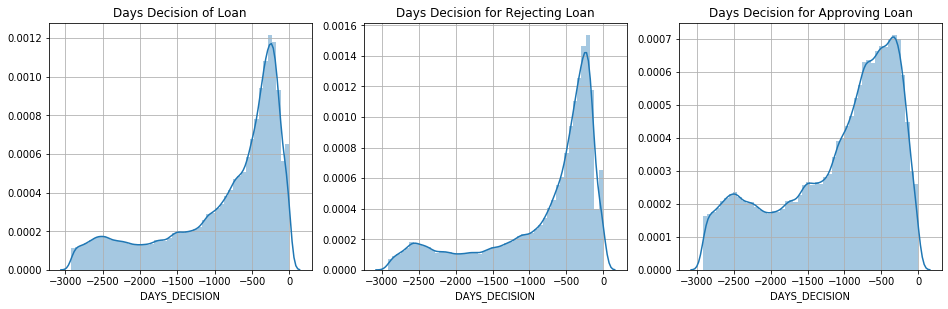

In [0]:
approved = prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Approved']
refused = prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Refused']

plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Days Decision of Loan')
days = prev_app['DAYS_DECISION'].dropna()
sns.distplot(days)
plt.grid(True)

plt.subplot(232)
plt.title('Days Decision for Rejecting Loan')
days = refused['DAYS_DECISION'].dropna()
sns.distplot(days)
plt.grid(True)

plt.subplot(233)
plt.title('Days Decision for Approving Loan')
days = approved['DAYS_DECISION'].dropna()
sns.distplot(days)
plt.grid(True)

Those who had their loan applications refused may have been applying for different reasons. These charts show the reasons of loan application in total, for those who had their loan refused, and approved. You can see there are differences. More loans were refused that did not fall under XNA and XNP categories.

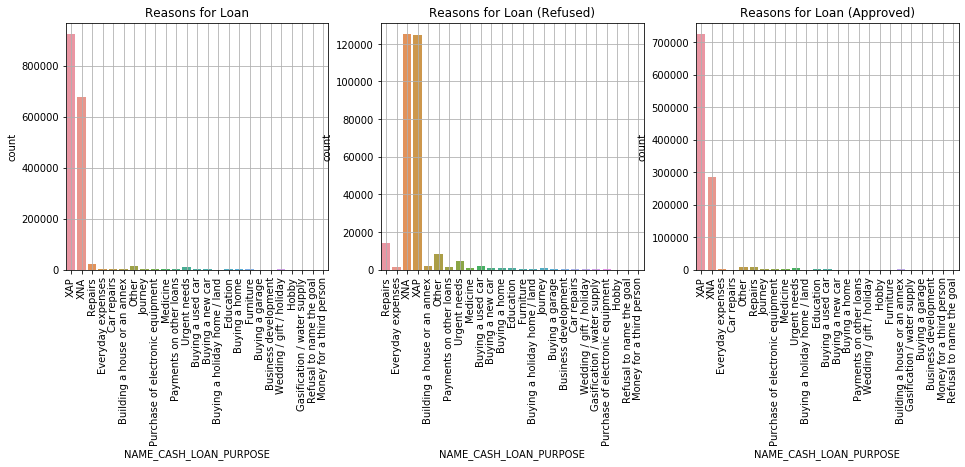

In [0]:
plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Reasons for Loan')
plt.xticks(rotation=90)
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=prev_app)
plt.grid(True)

plt.subplot(232)
plt.title('Reasons for Loan (Refused)')
plt.xticks(rotation=90)
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=refused)
plt.grid(True)

plt.subplot(233)
plt.title('Reasons for Loan (Approved)')
plt.xticks(rotation=90)
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=approved)
plt.grid(True)

There could be differences in the types of loan portfolios for refused and approved loan applications. Cash loans seem to be refused at a much higher rate compared to approved loans.

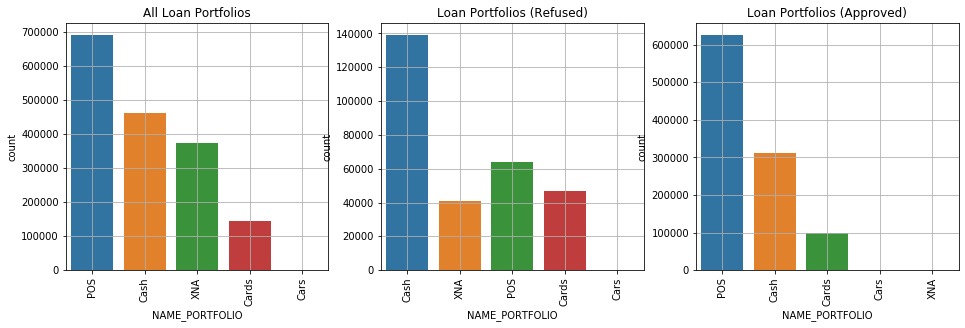

In [0]:
plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('All Loan Portfolios')
plt.xticks(rotation=90)
sns.countplot(x='NAME_PORTFOLIO',data=prev_app)
plt.grid(True)

plt.subplot(232)
plt.title('Loan Portfolios (Refused)')
plt.xticks(rotation=90)
sns.countplot(x='NAME_PORTFOLIO',data=refused)
plt.grid(True)

plt.subplot(233)
plt.title('Loan Portfolios (Approved)')
plt.xticks(rotation=90)
sns.countplot(x='NAME_PORTFOLIO',data=approved)
plt.grid(True)

Sometimes, approved customers will be approved for a different amount than what they applied for. They will either be approved for more, less, or the amount applied for. These histograms show that typically customers were approved for the amount they asked for, but sometimes there were a handful of outliers. Applying for loan and being given a much lower amount could point to defaulting.


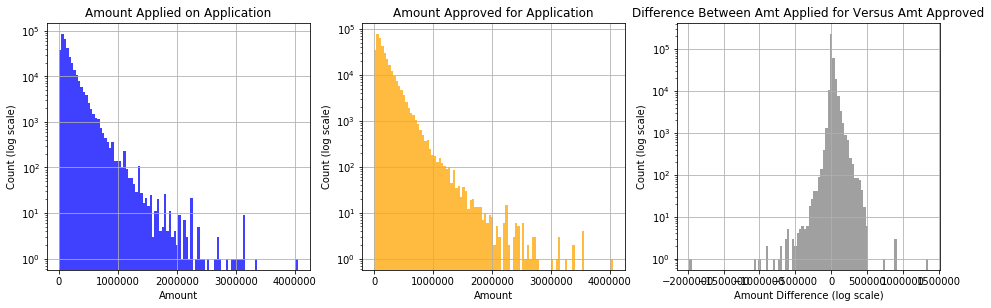

In [0]:
amts = prev_app.groupby("SK_ID_CURR")[["AMT_APPLICATION","AMT_CREDIT"]].mean()
amts["DIF"] = amts['AMT_CREDIT'] - amts['AMT_APPLICATION']

plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Amount Applied on Application')
plt.xlabel("Amount")
plt.ylabel("Count (log scale)")
n, bins, patches = plt.hist(amts["AMT_APPLICATION"], 100, facecolor='blue', alpha=0.75, log = True)
plt.grid(True)

plt.subplot(232)
plt.title('Amount Approved for Application')
plt.xlabel("Amount")
plt.ylabel("Count (log scale)")
n, bins, patches = plt.hist(amts["AMT_CREDIT"], 100, facecolor='orange', alpha=0.75, log = True)
plt.grid(True)

plt.subplot(233)
plt.title('Difference Between Amt Applied for Versus Amt Approved')
plt.xlabel("Amount Difference (log scale)")
plt.ylabel("Count (log scale)")
n, bins, patches = plt.hist(amts["DIF"], 100, facecolor='grey', alpha=0.75, log = True)
plt.grid(True)

This shows the distribution of primary interest rates and privelaged intersted rates.

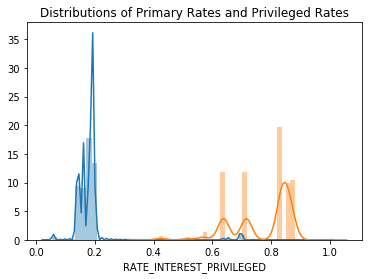

In [0]:
rate_pri = datasets["previous_application"]["RATE_INTEREST_PRIMARY"].dropna()
rate_priv = datasets["previous_application"]["RATE_INTEREST_PRIVILEGED"].dropna()
plt.title('Distributions of Primary Rates and Privileged Rates')
sns.distplot(rate_pri)
sns.distplot(rate_priv)
plt.show()

This shows the distribution of the days of the week when customers applied for loans. Sundays have the lowest count as it could indicate that many people do not go to the bank on Sundays.

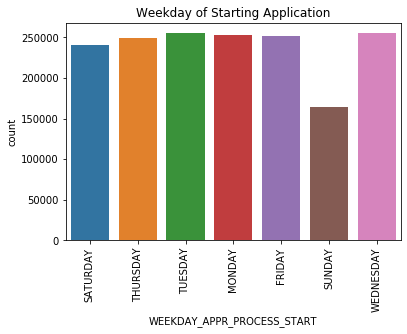

In [0]:
plt.title('Weekday of Starting Application')
plt.xticks(rotation=90)
sns.countplot(x='WEEKDAY_APPR_PROCESS_START',data=datasets["previous_application"]);

### POS CASH Balance
This dataset contains information on point of sales data with past loan applications. The first variable of interest is the distribution of contract statuses for each loan application. Most seem to be active, so it may be worthwhile to categorize the other statuses as "Other".


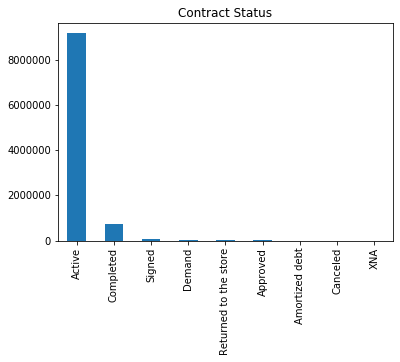

In [0]:
datasets["POS_CASH_balance"]['NAME_CONTRACT_STATUS'].value_counts().plot(kind='bar',title="Contract Status");

Days past due and days past due with tolerance show the number of days a late payment as passed. Below shows the distribution of these two fields, as well as the difference between them. This shows in general the distribution of acceptable later payments.

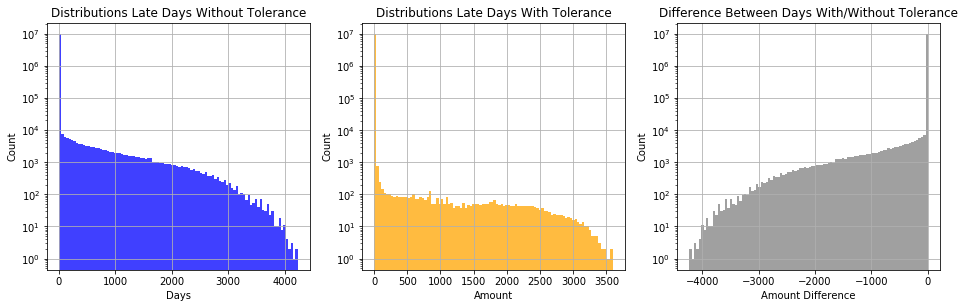

In [0]:
pos = datasets["POS_CASH_balance"]
tol_dif =  pos["SK_DPD_DEF"]-pos["SK_DPD"]

plt.figure(figsize = (16,10))
plt.subplot(231)
plt.title('Distributions Late Days Without Tolerance')
plt.xlabel("Days")
plt.ylabel("Count")
n, bins, patches = plt.hist(pos["SK_DPD"], 100, facecolor='blue', alpha=0.75, log = True)
plt.grid(True)

plt.subplot(232)
plt.title('Distributions Late Days With Tolerance')
plt.xlabel("Amount")
plt.ylabel("Count")
n, bins, patches = plt.hist(pos["SK_DPD_DEF"], 100, facecolor='orange', alpha=0.75, log = True)
plt.grid(True)

plt.subplot(233)
plt.title('Difference Between Days With/Without Tolerance')
plt.xlabel("Amount Difference")
plt.ylabel("Count")
n, bins, patches = plt.hist(tol_dif, 100, facecolor='grey', alpha=0.75, log = True)
plt.grid(True)

This shows the distribution of total pay

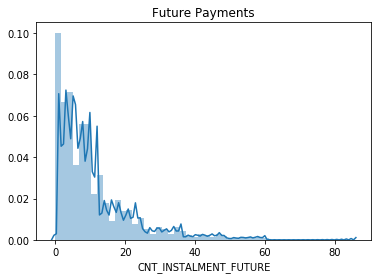

In [0]:
x = datasets["POS_CASH_balance"]["CNT_INSTALMENT_FUTURE"].dropna()
plt.title('Future Payments')
sns.distplot(x);

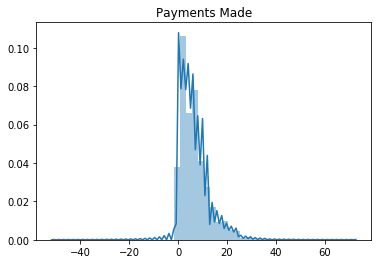

In [0]:
current_payments = datasets["POS_CASH_balance"]["CNT_INSTALMENT"] -  datasets["POS_CASH_balance"]["CNT_INSTALMENT_FUTURE"]
x = current_payments.dropna()
plt.title('Payments Made')
sns.distplot(x);

# Feature Engineering

## Feature Transformer Credit Card Balance

In [0]:
class CCBalFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # nothing else to do here
        self.agg_op_features = {}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Fill all the missing numeric values with 0 before aggregation
        X = X.fillna(0)
        sum_cols = ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
            'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
            'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']

        mean_sum_max_cols = ['SK_DPD', 'SK_DPD_DEF']

        sum_mean_cols = ['AMT_BALANCE', "AMT_CREDIT_LIMIT_ACTUAL"]

        count_cols = ['SK_ID_CURR']

        agg_op_features = {}

        for f in sum_cols:
            agg_op_features[f] = 'sum'

        for f in mean_sum_max_cols:
            agg_op_features[f] = ['mean', 'sum', 'max']
    
        for f in sum_mean_cols:
            agg_op_features[f] = ['mean', 'sum']

        for f in count_cols:
            agg_op_features[f] = 'count'
        
        cc_bal_ag = X[X['NAME_CONTRACT_STATUS'] != 'Refused'].groupby('SK_ID_CURR').agg(agg_op_features)
        cc_bal_ag.columns = cc_bal_ag.columns.map('_'.join)
        
        #Interest Percent Feature Creation
        cc_bal_ag['INTEREST_PCT'] = (cc_bal_ag['AMT_TOTAL_RECEIVABLE_sum'] - cc_bal_ag['AMT_RECEIVABLE_PRINCIPAL_sum'])/cc_bal_ag['AMT_TOTAL_RECEIVABLE_sum']
        cc_bal_ag['INTEREST_PCT'] = cc_bal_ag['INTEREST_PCT'].fillna(0)
        
        #Amount paid vs minimum required to pay
        cc_bal_ag["PAID_VS_MIN"] = (cc_bal_ag['AMT_PAYMENT_TOTAL_CURRENT_sum'] - cc_bal_ag['AMT_INST_MIN_REGULARITY_sum'])/cc_bal_ag['AMT_INST_MIN_REGULARITY_sum']
        cc_bal_ag["PAID_VS_MIN"] = cc_bal_ag["PAID_VS_MIN"].fillna(0)
                
        #Percent Usage of Credit Limit
        cc_bal_ag["PCT_CREDIT_USAGE"] = (cc_bal_ag['AMT_CREDIT_LIMIT_ACTUAL_sum'] - cc_bal_ag['AMT_BALANCE_sum'])/cc_bal_ag['AMT_CREDIT_LIMIT_ACTUAL_sum']
        cc_bal_ag["PCT_CREDIT_USAGE"] = cc_bal_ag["PCT_CREDIT_USAGE"].fillna(0)

        cc_bal_ag[np.isinf(cc_bal_ag)] = 0
        cc_bal_ag[np.isneginf(cc_bal_ag)] = 0
        
        return cc_bal_ag

## Feature Transformer Installment Payments (Includes Phase 3 Feature Engineering)

In [0]:
class InPayFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # nothing else to do here
        self.agg_op_features = {}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Fill missing 
        X['DAYS_ENTRY_PAYMENT'] = X['DAYS_ENTRY_PAYMENT'].fillna(X['DAYS_INSTALMENT'])        
        # Fill all the missing numeric values with 0 before aggregation
        X = X.fillna(0)

        ## Start Phase 3 Feature Engineering
        datasets['installments_payments']['Day_late'] = np.absolute(datasets['installments_payments']['DAYS_INSTALMENT']) - np.absolute(datasets['installments_payments']['DAYS_ENTRY_PAYMENT'])
        datasets['installments_payments']['HAS_LATE_PAYMENT'] = 0
        datasets['installments_payments']['HAS_EARLY_PAYMENT'] = 0
        datasets['installments_payments']['HAS_30_LATE_PAYMENT'] = 0
        datasets['installments_payments']['HAS_90_LATE_PAYMENT'] = 0
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] > 0, 'HAS_LATE_PAYMENT'] = 1
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] <= 0, 'HAS_LATE_PAYMENT'] = 0
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] < 0, 'HAS_EARLY_PAYMENT'] = 1
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] >= 0, 'HAS_EARLY_PAYMENT'] = 0
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] > 29, 'HAS_30_LATE_PAYMENT'] = 1
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] <= 29, 'HAS_30_LATE_PAYMENT'] = 0
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] > 89, 'HAS_90_LATE_PAYMENT'] = 1
        datasets['installments_payments'].loc[datasets['installments_payments']['Day_late'] <= 90, 'HAS_90_LATE_PAYMENT'] = 0 
        datasets['installments_payments'] = datasets['installments_payments'].fillna(0)
        ##End phase 3 feature engineering

        sum_cols = ['HAS_LATE_PAYMENT', 'HAS_30_LATE_PAYMENT', 'HAS_90_LATE_PAYMENT', 'HAS_EARLY_PAYMENT']
        
        sum_mean_cols = ['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']

        count_cols = ['SK_ID_CURR']

        agg_op_features = {}

        for f in sum_mean_cols:
            agg_op_features[f] = ['mean', 'sum']

        for f in sum_cols:
            agg_op_features[f] = 'sum'

        for f in count_cols:
            agg_op_features[f] = 'count'
        
        ip_ag = X.groupby('SK_ID_CURR').agg(agg_op_features)
        ip_ag.columns = ip_ag.columns.map('_'.join)
        
        #Create Feature of Percent of Installment Paid
        ip_ag['PCT_INST_PAID'] = ip_ag['AMT_PAYMENT_sum'] / ip_ag['AMT_INSTALMENT_sum'] 
        
        #Creation of Feature of Average Number of Days Late
        ip_ag['DAYS_LATE'] = abs(ip_ag['DAYS_ENTRY_PAYMENT_mean'] - ip_ag['DAYS_INSTALMENT_mean'])
        
        #Fill NAs incase division resulted in NaN
        ip_ag[np.isinf(ip_ag)] = 0
        ip_ag[np.isneginf(ip_ag)] = 0
        ip_ag = ip_ag.fillna(0)
        
        return ip_ag

## Feature Transformer Bureau Balance

Since this is smallest dataset in terms of columns, as part of feature engineering we can aggregate MONTHS_BALANCE and one hot encode STATUS column

In [0]:
class BureauBalanceFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # nothing else to do here

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        # Create an Index as an ID column 
        X.index = X['SK_ID_BUREAU']

        # Drop the actual ID column we can navigate dataset using Index column
        X.drop('SK_ID_BUREAU', inplace = True, axis = 1)
        

        # Divide and process Numeric and Categorical columns seperately to speed up processing
        num_cols = X.select_dtypes(exclude='object').columns
        cat_cols = X.select_dtypes(include='object').columns

        dfNumCols = X[num_cols]
        dfCatCols = X[cat_cols]

        # Numberic column processing. There is only 1 numeric column to process
        bureau_bal_num_cols = dfNumCols.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE' : [np.mean, np.sum, 'count']})
        bureau_bal_num_cols.columns = bureau_bal_num_cols.columns.map('_'.join)
        
        # print("After preprocessing numeric colums")
        # display(bureau_bal_num_cols.head())

        # Category column procesing.  There is only 1 column to process
        cat_encode = OneHotEncoder().fit(dfCatCols)

        bureau_bal_cat_cols = pd.DataFrame(cat_encode.transform(dfCatCols).toarray(
                ), index=dfCatCols.index, columns=list(cat_encode.get_feature_names(cat_cols)))
        bureau_bal_cat_cols = bureau_bal_cat_cols.groupby('SK_ID_BUREAU').agg(np.mean)

        # print("After preprocessing categorical colums")
        # display(bureau_bal_cat_cols.head())

        # Merge both the columns processed seperately as one data frame
        dfAggBureauBal = bureau_bal_num_cols.merge(bureau_bal_cat_cols, how='left', on='SK_ID_BUREAU')
        
        return dfAggBureauBal

## Feature Transformer Bureau

There are bunch of columns in Bureau dataset which can be aggregated. But in order to prepare data for merging into Application training set, bureau and bureau balance needs to be processed together. 

In [0]:
class BureauFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # nothing else to do here
        self.agg_op_features = {}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit

        # Divide and process Numeric and Categorical columns seperately to speed up processing
        num_cols = X.select_dtypes(exclude='object').columns
        cat_cols = X.select_dtypes(include='object').columns

        dfNumCols = X[num_cols]
        dfCatCols = X[cat_cols]
        
        # Fill all the missing numeric values with 0 before aggregation
        X = X.fillna(0)
        
        num_sum_cols = ['MONTHS_BALANCE_sum', 'MONTHS_BALANCE_count', 'STATUS_0', 'STATUS_1',
                'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X']

        num_max_cols = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE','DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG']

        num_mean_cols = ['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
                        'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE_mean']

        agg_op_features = {}

        # Numberic column processing. just calculate sum
        for f in num_sum_cols:
            agg_op_features[f] = 'sum'

        # Numberic column processing. Calculate mean max and min
        for f in num_max_cols:
            agg_op_features[f] = 'max'

        for f in num_mean_cols:
            agg_op_features[f] = 'mean'
        
        bureau_num_cols = dfNumCols.groupby('SK_ID_CURR').agg(agg_op_features)

        # print("After preprocessing numeric colums")
        # display(bureau_num_cols.head())
        
        # Category column procesing.  There is only 1 column to process
        cat_encode = OneHotEncoder().fit(dfCatCols)

        bureau_cat_cols = pd.DataFrame(cat_encode.transform(dfCatCols).toarray(
                ), index=dfCatCols.index, columns=list(cat_encode.get_feature_names(cat_cols)))
        bureau_cat_cols = bureau_cat_cols.groupby('SK_ID_CURR').agg(np.mean)

        # print("After preprocessing categorical colums")
        # display(bureau_cat_cols.head())

        # Merge both the columns processed seperately as one data frame
        dfAggBureau = bureau_num_cols.merge(bureau_cat_cols, how='left', on='SK_ID_CURR')

        return dfAggBureau

## Feature Transformer for POS CASH Balance

In [0]:
class POS_LABEL_ENCODER(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        
        X["NAME_CONTRACT_STATUS"] = X["NAME_CONTRACT_STATUS"].replace(["Completed","Signed","Demand",
                                                                      "Returned to the store",
                                                                      "Approved","Amortized debt",
                                                                      "Canceled","XNA"],"Other")
        encoder = LabelEncoder()
        encoding_vars = ["NAME_CONTRACT_STATUS"]
        
        X[encoding_vars] = X[encoding_vars].fillna("Unknown")

        for encoding_var in encoding_vars:
            label_cat = X[encoding_var]
            label_cat_encoded = encoder.fit_transform(label_cat)
            X[encoding_var] = label_cat_encoded

        X = X.groupby(["SK_ID_CURR"]).count()[["NAME_CONTRACT_STATUS"]].sort_values("NAME_CONTRACT_STATUS").groupby(level=0).tail(1)   
        self.fit(X)
            
        return X

In [0]:
class POS_NumericFeatureAggregator(BaseEstimator, TransformerMixin):
    
     def fit(self, X, y=None):
        return self
    
     def transform(self,X):
            
            numeric_vars = ["SK_ID_PREV","SK_ID_CURR","MONTHS_BALANCE",
                            "CNT_INSTALMENT","CNT_INSTALMENT_FUTURE",
                            "SK_DPD","SK_DPD_DEF"]
            
            X = X[numeric_vars].fillna(0)
            
            agg_opps = {}
            means = ["CNT_INSTALMENT","CNT_INSTALMENT_FUTURE","CNT_INSTALMENT"]
            min_max = ["SK_DPD","SK_DPD_DEF"]
            min_ = ["MONTHS_BALANCE"]
            
            X["MONTHS_BALANCE"] = abs(X["MONTHS_BALANCE"])
            
            for f in min_:
                agg_opps[f] = ["min"]
            
            for f in means:
                agg_opps[f] = ['mean']

            for f in min_max:
                agg_opps[f] = ["min","max"]
  
            result = X.groupby(["SK_ID_CURR"]).agg(agg_opps)
            result.columns = result.columns.droplevel()
            result.columns = ["MONTHS_BALANCE","CNT_INSTALMENT_MEAN",
                              "CNT_INSTALMENT_FUTURE_MEAN","SK_DPD_MIN",
                              "SK_DPD_MAX","SK_DPD_DEF_MIN","SK_DPD_DEF_MAX"]
            
            result = result.reset_index(level=["SK_ID_CURR"])
            result["SK_DFD_RANGE"] = result["SK_DPD_MAX"]-result["SK_DPD_MIN"]
            result["SK_DPD_DEF_RANGE"] = result["SK_DPD_DEF_MAX"]-result["SK_DPD_DEF_MIN"]
            result["AVG_PAYMENTS_MADE"] = result["CNT_INSTALMENT_MEAN"]-result["CNT_INSTALMENT_FUTURE_MEAN"]
            
            self.fit(result)
            return result

## Feature Transformer for Previous Application

In [0]:
class PA_OHE(BaseEstimator, TransformerMixin):
    
     def fit(self, X, y=None):
        return self
    
     def transform(self,X):
        X["NAME_TYPE_SUITE"] = X["NAME_TYPE_SUITE"].replace(np.nan,"Unknown")
        X["NAME_TYPE_SUITE"] = X["NAME_TYPE_SUITE"].replace(["Other_A","Other_B","Group of people","Unknown"],"Other")
        
        cats = ["NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS","NAME_TYPE_SUITE"]
        cat_encoder = OneHotEncoder()
        ohe_ = cat_encoder.fit_transform(X[cats])
        labels,values = cat_encoder.categories_,ohe_.toarray()
        labels = np.concatenate(labels).ravel().tolist()
        X[labels] = pd.DataFrame(values)
        X = X.drop(["NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS","NAME_TYPE_SUITE"],axis=1)
        
        cols = list(X.columns[2:13])
       
        sum_ = ["Approved","Canceled","Refused","Unused offer","Children",
                   "Family","Other","Spouse, partner","Unaccompanied"]
        agg_opps = {}
        
        for f in sum_:
            agg_opps[f] = ['sum']
            
        X1 = X.groupby(["SK_ID_CURR"]).agg(agg_opps)
        X1.columns = X1.columns.droplevel(1)
        
        X2 = X.groupby(["SK_ID_CURR"]).count()[cols].sort_values(cols).groupby(level=0).tail(1)
        X3 = X1.merge(X2,left_on="SK_ID_CURR",right_on="SK_ID_CURR")
        
        self.fit(X3)
        return X3

In [0]:
class PA_LABEL_ENCODER(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        
        X["NAME_TYPE_SUITE"] = X["NAME_TYPE_SUITE"].replace(np.nan,"Unknown")
        X["NAME_TYPE_SUITE"] = X["NAME_TYPE_SUITE"].replace(["Other_A","Other_B","Group of people","Unknown"],"Other")
        
        encoder = LabelEncoder()
        encoding_vars = ["WEEKDAY_APPR_PROCESS_START","NAME_CLIENT_TYPE","NAME_PAYMENT_TYPE","NAME_PRODUCT_TYPE",
                        "NAME_CASH_LOAN_PURPOSE","FLAG_LAST_APPL_PER_CONTRACT","NAME_SELLER_INDUSTRY",
                        "NAME_YIELD_GROUP","CODE_REJECT_REASON","CHANNEL_TYPE","PRODUCT_COMBINATION",
                        "NAME_PORTFOLIO","NAME_GOODS_CATEGORY"]
        
        X[encoding_vars] = prev_app[encoding_vars].fillna("Unknown")

        for encoding_var in encoding_vars:
            label_cat = X[encoding_var]
            label_cat_encoded = encoder.fit_transform(label_cat)
            X[encoding_var] = label_cat_encoded
        
        self.fit(X) 
        return X

In [0]:
class PA_NumericFeatureAggregator(BaseEstimator, TransformerMixin):
    
     def fit(self, X, y=None):
        return self
    
     def transform(self,X):
            
            X = X[X.columns].fillna(0)
            X["OUT_OF_POCKET"] = X["AMT_GOODS_PRICE"] - X["AMT_DOWN_PAYMENT"]
            X["DIFFERENCE"] = X["AMT_APPLICATION"] - X["OUT_OF_POCKET"]
            
            aggs_opp = {}
            min_max = ["AMT_ANNUITY"]
            mean_sum = ["AMT_APPLICATION"]
            mean_ = ["AMT_CREDIT","AMT_DOWN_PAYMENT",'SK_DPD_MIN','SK_DPD_DEF_MIN','SK_DPD_DEF_MAX',
                    'SK_DFD_RANGE','SK_DPD_DEF_RANGE','AVG_PAYMENTS_MADE','OUT_OF_POCKET',
                    'DIFFERENCE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
                    'DAYS_LAST_DUE','DAYS_TERMINATION','CNT_INSTALMENT_MEAN','CNT_INSTALMENT_FUTURE_MEAN',"AMT_GOODS_PRICE",
                    "OUT_OF_POCKET","DIFFERENCE"]
            
            for f in min_max:
                aggs_opp[f] = ['min','max']
                
            for f in mean_sum:
                aggs_opp[f] = ['mean','sum']
                
            for f in mean_:
                aggs_opp[f] = ['mean']

            X1 = X.groupby(["SK_ID_CURR"]).agg(aggs_opp)
            X1.columns = X1.columns.droplevel(1)
            X1.columns = ["min_ANNUITY","max_ANNUITY","AMT_APPLICATION_MEAN","APPLICATION_SUM",
                          "AMT_CREDIT_MEAN","AMT_DOWN_PAYMENT",'SK_DPD_MIN','SK_DPD_DEF_MIN',
                          'SK_DPD_DEF_MAX','SK_DFD_RANGE','SK_DPD_DEF_RANGE','AVG_PAYMENTS_MADE',
                          'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
                          'DAYS_LAST_DUE','DAYS_TERMINATION','CNT_INSTALMENT_MEAN','CNT_INSTALMENT_FUTURE_MEAN',
                          "AMT_GOODS_PRICE","OUT_OF_POCKET","DIFFERENCE"
                         ]

            X1 = X1.reset_index(level=["SK_ID_CURR"])
            X1['AMT_ANNUITY_RANGE'] = X1["max_ANNUITY"] - X1["min_ANNUITY"]
            X1['AMT_DIFFERNCE'] = X1["AMT_CREDIT_MEAN"] - X1["AMT_APPLICATION_MEAN"]

            self.fit(X1)
            return X1

In [0]:
class PA_FEATURE_AGGREGATOR(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        X["TOTAL"] = X["Approved"] + X["Canceled"] + X["Refused"] + X["Unused offer"]
        X["APPROVED_PERCENT"] = X["Approved"]/X["TOTAL"]
        X["CANCELED_PERCENT"] = X["Canceled"]/X["TOTAL"]
        X["REFUSED_PERCENT"] = X["Refused"]/X["TOTAL"]
        X["UNUSED_PERCENT"] = X["Unused offer"]/X["TOTAL"]
        
        self.fit(X)
        return X

# Data Processing

## Process individual datasets pipelines

### POS_CASH_Balance pipe line

In [0]:
pos_encoder_pipeline = Pipeline([
    ('label',POS_LABEL_ENCODER())
    ])

df_pos_cat_aggregated = pos_encoder_pipeline.transform(datasets["POS_CASH_balance"])
# df_cat.head(3)

pos_numeric_pipeline = Pipeline([
    ('pos_pipelne', POS_NumericFeatureAggregator())
    ])

df_pos_numeric_aggregated = pos_numeric_pipeline.transform(datasets["POS_CASH_balance"])
# df_pos_numeric_aggregated.head(5)

df_pos = df_pos_cat_aggregated.merge(df_pos_numeric_aggregated,left_on="SK_ID_CURR",right_on="SK_ID_CURR")
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337252 entries, 0 to 337251
Data columns (total 12 columns):
SK_ID_CURR                    337252 non-null int64
NAME_CONTRACT_STATUS          337252 non-null int64
MONTHS_BALANCE_MEAN           337252 non-null float64
CNT_INSTALMENT_MEAN           337252 non-null float64
CNT_INSTALMENT_FUTURE_MEAN    337252 non-null float64
SK_DPD_MIN                    337252 non-null int64
SK_DPD_MAX                    337252 non-null int64
SK_DPD_DEF_MIN                337252 non-null int64
SK_DPD_DEF_MAX                337252 non-null int64
SK_DFD_RANGE                  337252 non-null int64
SK_DPD_DEF_RANGE              337252 non-null int64
AVG_PAYMENTS_MADE             337252 non-null float64
dtypes: float64(4), int64(8)
memory usage: 33.4 MB


### Previous application pipeline

In [0]:
# Process categorical data
prev_app = datasets["previous_application"]
prev_app_str = prev_app.drop(prev_app._get_numeric_data().columns[2:],axis=1)
pa_encoder_pipeline = Pipeline([
    ('label',PA_LABEL_ENCODER()),
    ('ohe',PA_OHE()),
    ])
df_cat = pa_encoder_pipeline.transform(prev_app_str)

# Procss numerical data
prev_app_numeric = prev_app._get_numeric_data()
pa_numeric_pipeline = Pipeline([
    ('pa_pipelne', PA_NumericFeatureAggregator()),
    ])
df_pa_numeric_aggregated = pa_numeric_pipeline.transform(prev_app_numeric)

# Merge categorical and numerical data
df_aggregated = df_pa_numeric_aggregated.merge(df_cat,left_on="SK_ID_CURR",right_on="SK_ID_CURR")

# Feed merged data into final pipeline
pa_feature_pipeline = Pipeline([
    ('feature_agg',PA_FEATURE_AGGREGATOR())
])
df_prevApp = pa_feature_pipeline.transform(df_aggregated)
df_prevApp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 0 to 338856
Data columns (total 35 columns):
SK_ID_CURR                     338857 non-null int64
min_ANNUITY                    338857 non-null float64
max_ANNUITY                    338857 non-null float64
AMT_APPLICATION_MEAN           338857 non-null float64
APPLICATION_SUM                338857 non-null float64
AMT_CREDIT_MEAN                338857 non-null float64
AMT_DOWN_PAYMENT               338857 non-null float64
AMT_GOODS_PRICE                338857 non-null float64
AMT_ANNUITY_RANGE              338857 non-null float64
AMT_DIFFERNCE                  338857 non-null float64
Approved                       338857 non-null float64
Canceled                       338857 non-null float64
Refused                        338857 non-null float64
Unused offer                   338857 non-null float64
Children                       338857 non-null float64
Family                         338857 non-null float64
Other      

### Installment payment pipeline

In [0]:
inpay_feature_pipeline = make_pipeline(
    (InPayFeaturesAggregater())
)

inPay_aggregated = inpay_feature_pipeline.transform(datasets['installments_payments'])
inPay_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339587 entries, 100001 to 456255
Data columns (total 11 columns):
DAYS_INSTALMENT_mean       339587 non-null float64
DAYS_INSTALMENT_sum        339587 non-null float64
DAYS_ENTRY_PAYMENT_mean    339587 non-null float64
DAYS_ENTRY_PAYMENT_sum     339587 non-null float64
AMT_INSTALMENT_mean        339587 non-null float64
AMT_INSTALMENT_sum         339587 non-null float64
AMT_PAYMENT_mean           339587 non-null float64
AMT_PAYMENT_sum            339587 non-null float64
SK_ID_CURR_count           339587 non-null int64
PCT_INST_PAID              339587 non-null float64
DAYS_LATE                  339587 non-null float64
dtypes: float64(10), int64(1)
memory usage: 31.1 MB


### Credit Card Balance pipeline

In [0]:
cc_bal_feature_pipeline = make_pipeline(
    (CCBalFeaturesAggregater())
)

ccBal_aggregated = cc_bal_feature_pipeline.transform(datasets['credit_card_balance'])
ccBal_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103558 entries, 100006 to 456250
Data columns (total 29 columns):
AMT_DRAWINGS_ATM_CURRENT_sum      103558 non-null float64
AMT_DRAWINGS_CURRENT_sum          103558 non-null float64
AMT_DRAWINGS_OTHER_CURRENT_sum    103558 non-null float64
AMT_DRAWINGS_POS_CURRENT_sum      103558 non-null float64
AMT_INST_MIN_REGULARITY_sum       103558 non-null float64
AMT_PAYMENT_CURRENT_sum           103558 non-null float64
AMT_PAYMENT_TOTAL_CURRENT_sum     103558 non-null float64
AMT_RECEIVABLE_PRINCIPAL_sum      103558 non-null float64
AMT_RECIVABLE_sum                 103558 non-null float64
AMT_TOTAL_RECEIVABLE_sum          103558 non-null float64
CNT_DRAWINGS_ATM_CURRENT_sum      103558 non-null float64
CNT_DRAWINGS_CURRENT_sum          103558 non-null int64
CNT_DRAWINGS_OTHER_CURRENT_sum    103558 non-null float64
CNT_DRAWINGS_POS_CURRENT_sum      103558 non-null float64
CNT_INSTALMENT_MATURE_CUM_sum     103558 non-null float64
SK_DPD_mean     

### Bureau Balance pipeline

In [0]:
%%time
bureaubal_preprocess = make_pipeline(
    (BureauBalanceFeaturesAggregater())
)

bureaubal_preprocess

dfAggBureauBal = bureaubal_preprocess.fit_transform(datasets["bureau_balance"])
dfAggBureauBal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817395 entries, 5001709 to 6842888
Data columns (total 11 columns):
MONTHS_BALANCE_mean     817395 non-null float64
MONTHS_BALANCE_sum      817395 non-null int64
MONTHS_BALANCE_count    817395 non-null int64
STATUS_0                817395 non-null float64
STATUS_1                817395 non-null float64
STATUS_2                817395 non-null float64
STATUS_3                817395 non-null float64
STATUS_4                817395 non-null float64
STATUS_5                817395 non-null float64
STATUS_C                817395 non-null float64
STATUS_X                817395 non-null float64
dtypes: float64(9), int64(2)
memory usage: 74.8 MB
CPU times: user 15.2 s, sys: 2.48 s, total: 17.7 s
Wall time: 15 s


### Bureau pipeline

In [0]:
# #Merge Bureau and Bureau Balance 
dfMergedBureau = datasets["bureau"].merge(dfAggBureauBal, how='left', on='SK_ID_BUREAU')
dfMergedBureau = dfMergedBureau.reset_index(drop=True)

#Set new index
dfMergedBureau.index = dfMergedBureau['SK_ID_CURR']

# Drop the actual ID column we can navigate dataset using Index column
dfMergedBureau.drop(['SK_ID_CURR','SK_ID_BUREAU'], inplace = True, axis = 1)

# If more than 70% values are missing then lets drop those features 
bureau_missing_values = (dfMergedBureau.isnull().sum() / len(dfMergedBureau)).sort_values(ascending = False)
bureau_missing_values.head()

bureau_missing_values = bureau_missing_values.index[bureau_missing_values > 0.70]
dfMergedBureau.drop(columns = list(bureau_missing_values), inplace = True, axis = 1)

In [0]:
%%time
bureau_preprocess = make_pipeline(
       (BureauFeaturesAggregater())
)

dfAggBureau = bureau_preprocess.fit_transform(dfMergedBureau)
dfAggBureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305811 entries, 100001 to 456255
Data columns (total 44 columns):
MONTHS_BALANCE_sum                                          305811 non-null float64
MONTHS_BALANCE_count                                        305811 non-null float64
STATUS_0                                                    305811 non-null float64
STATUS_1                                                    305811 non-null float64
STATUS_2                                                    305811 non-null float64
STATUS_3                                                    305811 non-null float64
STATUS_4                                                    305811 non-null float64
STATUS_5                                                    305811 non-null float64
STATUS_C                                                    305811 non-null float64
STATUS_X                                                    305811 non-null float64
DAYS_CREDIT                                 

## Join labeled dataset

Free up some memory before joining

In [0]:
gc.enable()
del datasets["bureau"], datasets["bureau_balance"], datasets["credit_card_balance"], datasets["installments_payments"],
datasets["previous_application"], datasets["POS_CASH_balance"]
gc.collect()

6321

In [0]:
X_kaggle_train= datasets["application_train"] #primary dataset

merge_all_data = True

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_train = X_kaggle_train.merge(df_prevApp, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Credit Card Balance Data
    X_kaggle_train = X_kaggle_train.merge(ccBal_aggregated, how='left', on="SK_ID_CURR")

     # 3. Join/Merge in Installment Payments Data
    X_kaggle_train = X_kaggle_train.merge(inPay_aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated Bureau Data
    X_kaggle_train = X_kaggle_train.merge(dfAggBureau, how='left', on="SK_ID_CURR")

    # 5. Join/Merge in POS_CASH_Balance
    X_kaggle_train = X_kaggle_train.merge(df_pos, how='left', on='SK_ID_CURR')

Merged train data 

In [0]:
if merge_all_data:
    # Reset the index column on X_kaggle_train 
    X_kaggle_train = X_kaggle_train.reset_index(drop=True)

    # Set Index as an ID column 
    X_kaggle_train.index = X_kaggle_train['SK_ID_CURR']

    # Drop the actual ID column we can navigate dataset using Index column
    X_kaggle_train.drop('SK_ID_CURR', inplace = True, axis = 1)

    print(f"X_kaggle_train shape is: {X_kaggle_train.shape}")
    print("\n***X_kaggle_train info***")
    print(X_kaggle_train.info())

    print("*** Index Column ***")
    print(X_kaggle_train.index)

    print("***Columns ***")
    print(X_kaggle_train.columns)

X_kaggle_train shape is: (307511, 250)

***X_kaggle_train info***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 250 entries, TARGET to AVG_PAYMENTS_MADE
dtypes: float64(194), int64(40), object(16)
memory usage: 588.9+ MB
None
*** Index Column ***
Int64Index([100002, 100003, 100004, 100006, 100007, 100008, 100009, 100010,
            100011, 100012,
            ...
            456245, 456246, 456247, 456248, 456249, 456251, 456252, 456253,
            456254, 456255],
           dtype='int64', name='SK_ID_CURR', length=307511)
***Columns ***
Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE_x',
       ...
       'MONTHS_BALANCE_MEAN', 'CNT_INSTALMENT_MEAN',
       'CNT_INSTALMENT_FUTURE_MEAN', 'SK_DPD_MIN', 'SK_DPD_MAX',
       'SK_DPD_DEF_MIN', 'SK_DPD_DEF_MAX', 'SK_DFD_RANGE', 'SK_DPD_DEF_RANGE',
       'AV

In [0]:
file_path = os.path.join(DATA_DIR,"Final_train_data.csv")
print(file_path)
X_kaggle_train.to_csv(file_path)

Data/home-credit-default-risk/Final_train_data.csv


## Join unlabeled dataset

In [0]:
X_kaggle_test= datasets["application_test"]

if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(df_prevApp, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Credit Card Balance Data
    X_kaggle_test = X_kaggle_test.merge(ccBal_aggregated, how='left', on="SK_ID_CURR")

     # 3. Join/Merge in Installment Payments Data
    X_kaggle_test = X_kaggle_test.merge(inPay_aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated Bureau Data
    X_kaggle_test = X_kaggle_test.merge(dfAggBureau, how='left', on="SK_ID_CURR")

    # 5. Join/Merge in POS_CASH_Balance
    X_kaggle_test = X_kaggle_test.merge(df_pos, how='left', on='SK_ID_CURR')

Merged test data

In [0]:
 if merge_all_data:
    # Reset the index column on X_train 
    X_kaggle_test = X_kaggle_test.reset_index(drop=True)

    # Set Index as an ID column 
    X_kaggle_test.index = X_kaggle_test['SK_ID_CURR']

    # Drop the actual ID column we can navigate dataset using Index column
    X_kaggle_test.drop('SK_ID_CURR', inplace = True, axis = 1)

    print(f"X_kaggle_test shape is: {X_kaggle_test.shape}")
    print("\n***X_kaggle_test info***")
    print(X_kaggle_test.info())

    print("*** Index Column ***")
    print(X_kaggle_test.index)

    print("***Columns ***")
    print(X_kaggle_test.columns)

X_kaggle_test shape is: (48744, 249)

***X_kaggle_test info***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Columns: 249 entries, NAME_CONTRACT_TYPE to AVG_PAYMENTS_MADE
dtypes: float64(194), int64(39), object(16)
memory usage: 93.0+ MB
None
*** Index Column ***
Int64Index([100001, 100005, 100013, 100028, 100038, 100042, 100057, 100065,
            100066, 100067,
            ...
            456168, 456169, 456170, 456189, 456202, 456221, 456222, 456223,
            456224, 456250],
           dtype='int64', name='SK_ID_CURR', length=48744)
***Columns ***
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       ...
       'MONTHS_BALANCE_MEAN', 'CNT_INSTALMENT_MEAN',
       'CNT_INSTALMENT_FUTURE_MEAN', 'SK_DPD_MIN', 'SK_DPD_MAX',
       'SK_DPD_DEF_MIN', 'SK_DPD_DEF_MAX', 'SK_DFD_RANGE', 'SK_DPD_DEF_RAN

In [0]:
file_path = os.path.join(DATA_DIR,"Final_test_data.csv")
print(file_path)
X_kaggle_test.to_csv(file_path)

Data/home-credit-default-risk/Final_test_data.csv


## Import Merged Data

If you have already merged the data and saved it to CSV, you can use the following to just import those fully merged files so you do not have to take up the time to run all the merging

In [0]:
DATA_DIR = 'Data/home-credit-default-risk'

Final_train_data = 'Final_train_data'
Final_test_data = 'Final_test_data'

X_kaggle_train = load_data(os.path.join(DATA_DIR, f'{Final_train_data}.csv'), Final_train_data)
X_kaggle_test = load_data(os.path.join(DATA_DIR, f'{Final_test_data}.csv'), Final_test_data)

Final_train_data: shape is (307511, 251)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 251 entries, SK_ID_CURR to AVG_PAYMENTS_MADE
dtypes: float64(194), int64(41), object(16)
memory usage: 588.9+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,MONTHS_BALANCE_MEAN,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_FUTURE_MEAN,SK_DPD_MIN,SK_DPD_MAX,SK_DPD_DEF_MIN,SK_DPD_DEF_MAX,SK_DFD_RANGE,SK_DPD_DEF_RANGE,AVG_PAYMENTS_MADE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-10.000000,24.000000,15.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-43.785714,10.107143,5.785714,0.0,0.0,0.0,0.0,0.0,0.0,4.321429
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-25.500000,3.750000,2.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.500000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-9.619048,11.428571,8.238095,0.0,0.0,0.0,0.0,0.0,0.0,3.190476
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-33.636364,15.333333,8.969697,0.0,0.0,0.0,0.0,0.0,0.0,6.363636


Final_test_data: shape is (48744, 250)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 250 entries, SK_ID_CURR to AVG_PAYMENTS_MADE
dtypes: float64(194), int64(40), object(16)
memory usage: 93.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,...,MONTHS_BALANCE_MEAN,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_FUTURE_MEAN,SK_DPD_MIN,SK_DPD_MAX,SK_DPD_DEF_MIN,SK_DPD_DEF_MAX,SK_DFD_RANGE,SK_DPD_DEF_RANGE,AVG_PAYMENTS_MADE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,-72.555556,4.000000,1.444444,0.0,7.0,0.0,7.0,7.0,7.0,2.555556
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,-20.000000,10.636364,6.545455,0.0,0.0,0.0,0.0,0.0,0.0,4.090909
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,-29.555556,21.388889,15.305556,0.0,18.0,0.0,0.0,18.0,0.0,6.083333
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,-41.967742,20.354839,10.129032,0.0,0.0,0.0,0.0,0.0,0.0,10.225806
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,-21.000000,12.000000,5.846154,0.0,0.0,0.0,0.0,0.0,0.0,6.153846


# Phase 2 EDA on Merged Data

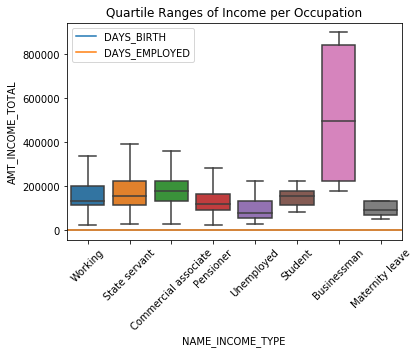

In [0]:
days_alive = 'DAYS_BIRTH'
days_work = 'DAYS_EMPLOYED'

# CHANGE DF TO ACTUAL MERGED DATA
X_kaggle_train[[days_alive,days_work]].plot.kde(title="Distributions of Days Worked Versus Days Alive")

# CHANGE DF TO ACTUAL MERGED DATA
plt.title('Quartile Ranges of Income per Occupation')
plt.xticks(rotation=45)
sns.boxplot(x=X_kaggle_train["NAME_INCOME_TYPE"], y=X_kaggle_train["AMT_INCOME_TOTAL"],showfliers = False)

# Phase 2 Feature Engineering Pipeline

For phase 2, we are engineering features based on our merged dataset, so this can be done after our previous merges. 

In [0]:
class FinalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # nothing else to do here
        self.agg_op_features = {}
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #Create new categories based on these
        keys = ['AMT_CREDIT', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AMT_CREDIT']
        for key in keys:
            X[key] = X[key].mask(X[key]==0).fillna(X[key].mean())
        
        X['INCOME_CREDIT_PERC'] = X['AMT_INCOME_TOTAL']/X['AMT_CREDIT']
        X['DAYS_EMPLOYED_PERC'] = X['DAYS_EMPLOYED']/X['DAYS_BIRTH']
        X['ANNUITY_INCOME_PERC'] = X['AMT_ANNUITY']/X['AMT_INCOME_TOTAL']
        X['INCOME_PER_PERSON'] = X['AMT_INCOME_TOTAL']/X['CNT_FAM_MEMBERS']
        X['PAYMENT_RATE'] = X['AMT_ANNUITY']/X['AMT_CREDIT']
        
        #Create Age as a Category
        bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
        names = ['<18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
        X['AGE_GROUP'] = pd.cut(-1 * X['DAYS_BIRTH'] / 365, bins, labels=names)

        #Create ratio that shows how much of lifetime as been dedicated to work
        days_alive = 'DAYS_BIRTH'
        days_work = 'DAYS_EMPLOYED'

        X[days_alive] = X[days_alive].fillna(0)
        X[days_work] = X[days_work].fillna(0)
  
        X['Work_Life_Ratio'] = abs(X[days_work]/X[days_alive])

        #Separate income into quartiles
        q1,q2,q3,q4 = X['AMT_INCOME_TOTAL'].quantile(.25),X['AMT_INCOME_TOTAL'].quantile(.5),X['AMT_INCOME_TOTAL'].quantile(.75),X['AMT_INCOME_TOTAL'].quantile(1)

        X.loc[X['AMT_INCOME_TOTAL'] < q2, 'Income_Quartile'] = 1
        X.loc[(X['AMT_INCOME_TOTAL'] >= q2) & (X['AMT_INCOME_TOTAL'] < q3), 'Income_Quartile'] = 2
        X.loc[(X['AMT_INCOME_TOTAL'] >= q3) & (X['AMT_INCOME_TOTAL'] < q4), 'Income_Quartile'] = 3
        X.loc[X['AMT_INCOME_TOTAL'] >= q4, 'Income_Quartile'] = 4
        
        return X


In [0]:
final_feature_pipeline = make_pipeline(
    (FinalFeatures())
)

#Feature Engineer Training Data
X_final_train = final_feature_pipeline.transform(X_kaggle_train)
X_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 259 entries, SK_ID_CURR to Income_Quartile
dtypes: category(1), float64(201), int64(41), object(16)
memory usage: 605.6+ MB


In [0]:
#Feature Engineering Test Data
X_final_test = final_feature_pipeline.transform(X_kaggle_test)
X_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 258 entries, SK_ID_CURR to Income_Quartile
dtypes: category(1), float64(201), int64(40), object(16)
memory usage: 95.6+ MB


In [0]:
#Export the train data with the new features in it
file_path = os.path.join(DATA_DIR,"Final_train_data.csv")
print(file_path)
X_final_train.to_csv(file_path)

Data/home-credit-default-risk/Final_train_data.csv


In [0]:
#Export the test data with the new features in it
file_path = os.path.join(DATA_DIR,"Final_test_data.csv")
print(file_path)
X_final_test.to_csv(file_path)

Data/home-credit-default-risk/Final_test_data.csv


# Prepare Data

In [0]:
#Use this section if you want to load the processed data directly and run further

#Uncomment if needed
#USERNAME: AppliedMLgroup9@gmail.com
#PASSWORD: catsarecool
# from google.colab import drive
# drive.mount('/content/gdrive')

DATA_DIR = "Data/home-credit-default-risk"

Final_train_data = 'Final_train_data'
Final_test_data = 'Final_test_data'

X_kaggle_train = load_data(os.path.join(DATA_DIR, f'{Final_train_data}.csv'), Final_train_data)
X_kaggle_test = load_data(os.path.join(DATA_DIR, f'{Final_test_data}.csv'), Final_test_data)


Final_train_data: shape is (307511, 260)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 260 entries, Unnamed: 0 to Income_Quartile
dtypes: float64(201), int64(42), object(17)
memory usage: 610.0+ MB
None


,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,SK_DPD_DEF_RANGE,AVG_PAYMENTS_MADE,INCOME_CREDIT_PERC,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,INCOME_PER_PERSON,PAYMENT_RATE,AGE_GROUP,Work_Life_Ratio,Income_Quartile
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0.0,9.000000,0.498036,0.067329,0.121978,202500.0,0.060749,25-35,0.067329,3.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,4.321429,0.208736,0.070862,0.132217,135000.0,0.027598,45-55,0.070862,3.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0.0,1.500000,0.500000,0.011814,0.100000,67500.0,0.050000,45-55,0.011814,1.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0.0,3.190476,0.431748,0.159905,0.219900,67500.0,0.094941,45-55,0.159905,1.0
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0.0,6.363636,0.236842,0.152418,0.179963,121500.0,0.042623,45-55,0.152418,1.0


Final_test_data: shape is (48744, 259)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 259 entries, Unnamed: 0 to Income_Quartile
dtypes: float64(201), int64(41), object(17)
memory usage: 96.3+ MB
None


,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,SK_DPD_DEF_RANGE,AVG_PAYMENTS_MADE,INCOME_CREDIT_PERC,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,INCOME_PER_PERSON,PAYMENT_RATE,AGE_GROUP,Work_Life_Ratio,Income_Quartile
0,0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,...,7.0,2.555556,0.237342,0.121044,0.152300,67500.0,0.036147,45-55,0.121044,1.0
1,1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,...,0.0,4.090909,0.444409,0.247398,0.175455,49500.0,0.077973,45-55,0.247398,1.0
2,2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,...,0.0,6.083333,0.305308,0.222477,0.344578,101250.0,0.105202,45-55,0.222477,2.0
3,3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,...,0.0,10.225806,0.200000,0.133515,0.155614,78750.0,0.031123,35-45,0.133515,3.0
4,4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,...,0.0,6.153846,0.287770,0.168021,0.178150,60000.0,0.051266,35-45,0.168021,2.0


## Merged training data at glance

In [0]:
X_kaggle_train.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,SK_DFD_RANGE,SK_DPD_DEF_RANGE,AVG_PAYMENTS_MADE,INCOME_CREDIT_PERC,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,INCOME_PER_PERSON,PAYMENT_RATE,Work_Life_Ratio,Income_Quartile
count,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,...,289444.000000,289444.000000,289444.000000,307511.000000,307511.000000,307499.000000,3.075110e+05,307499.000000,307511.000000,307511.000000
mean,153755.000000,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,...,15.646001,1.467776,5.445328,0.399670,-2.920135,0.180930,9.310626e+04,0.053695,3.177365,1.785787
std,88770.923652,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,...,152.131957,30.507220,2.615713,0.507924,6.627098,0.094574,1.013732e+05,0.022481,6.507685,0.860170
min,0.000000,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,...,0.000000,0.000000,-0.736842,0.011801,-47.489663,0.000224,2.812500e+03,0.022073,0.000000,1.000000
25%,76877.500000,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,...,0.000000,0.000000,3.666667,0.193803,0.021559,0.114782,4.725000e+04,0.036900,0.068385,1.000000
50%,153755.000000,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,...,0.000000,0.000000,5.000000,0.306272,0.088645,0.162833,7.500000e+04,0.050000,0.155791,2.000000
75%,230632.500000,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,...,0.000000,0.000000,6.567568,0.495376,0.191000,0.229067,1.125000e+05,0.064043,0.367279,3.000000
max,307510.000000,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,...,4231.000000,3373.000000,36.095890,208.003328,0.728811,1.875965,3.900000e+07,0.124430,47.489663,4.000000


Identify percentage of missing values. Top 20 colums.

In [0]:
percent = (X_kaggle_train.isnull().sum()/X_kaggle_train.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = X_kaggle_train.isna().sum().sort_values(ascending = False)
missing_merged_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_merged_train_data.head(20)

,Percent,Missing Count
AMT_CREDIT_LIMIT_ACTUAL_sum,71.74,220606
SK_DPD_mean,71.74,220606
AMT_DRAWINGS_POS_CURRENT_sum,71.74,220606
AMT_PAYMENT_CURRENT_sum,71.74,220606
AMT_PAYMENT_TOTAL_CURRENT_sum,71.74,220606
AMT_RECEIVABLE_PRINCIPAL_sum,71.74,220606
AMT_RECIVABLE_sum,71.74,220606
AMT_TOTAL_RECEIVABLE_sum,71.74,220606
CNT_DRAWINGS_ATM_CURRENT_sum,71.74,220606
CNT_DRAWINGS_CURRENT_sum,71.74,220606


Derive list of all columns with missing percentage greater than 70%. These columns can be dropped

In [0]:
missing_merged_train_values = missing_merged_train_data.index[missing_merged_train_data.Percent > 70]
print("Total columns with missing values ", len(missing_merged_train_values),"\n", missing_merged_train_values)

Total columns with missing values  30 
 Index(['AMT_CREDIT_LIMIT_ACTUAL_sum', 'SK_DPD_mean',
       'AMT_DRAWINGS_POS_CURRENT_sum', 'AMT_PAYMENT_CURRENT_sum',
       'AMT_PAYMENT_TOTAL_CURRENT_sum', 'AMT_RECEIVABLE_PRINCIPAL_sum',
       'AMT_RECIVABLE_sum', 'AMT_TOTAL_RECEIVABLE_sum',
       'CNT_DRAWINGS_ATM_CURRENT_sum', 'CNT_DRAWINGS_CURRENT_sum',
       'CNT_DRAWINGS_OTHER_CURRENT_sum', 'CNT_DRAWINGS_POS_CURRENT_sum',
       'CNT_INSTALMENT_MATURE_CUM_sum', 'SK_DPD_sum',
       'AMT_DRAWINGS_CURRENT_sum', 'SK_DPD_max', 'SK_DPD_DEF_mean',
       'SK_DPD_DEF_sum', 'SK_DPD_DEF_max', 'AMT_BALANCE_mean',
       'AMT_BALANCE_sum', 'AMT_CREDIT_LIMIT_ACTUAL_mean', 'SK_ID_CURR_count_x',
       'INTEREST_PCT', 'PAID_VS_MIN', 'PCT_CREDIT_USAGE',
       'AMT_DRAWINGS_OTHER_CURRENT_sum', 'AMT_INST_MIN_REGULARITY_sum',
       'AMT_DRAWINGS_ATM_CURRENT_sum', 'MONTHS_BALANCE_mean'],
      dtype='object')


## Merged test data at glan

In [0]:
X_kaggle_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,MONTHS_BALANCE_MEAN,CNT_INSTALMENT_MEAN,CNT_INSTALMENT_FUTURE_MEAN,SK_DPD_MIN,SK_DPD_MAX,SK_DPD_DEF_MIN,SK_DPD_DEF_MAX,SK_DFD_RANGE,SK_DPD_DEF_RANGE,AVG_PAYMENTS_MADE
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,47808.000000,47808.000000,47808.000000,47808.000000,47808.000000,47808.0,47808.000000,47808.000000,47808.000000,47808.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,-32.126681,14.693976,9.132147,0.018072,12.850966,0.0,1.500753,12.832894,1.500753,5.561829
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,19.944008,7.995921,6.307591,2.532977,139.760535,0.0,41.281338,139.370997,41.281338,2.789839
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,-95.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,-43.883654,9.548387,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.642857
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,-28.500000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,-16.000000,18.823529,11.588235,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6.921559
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,-1.000000,60.319149,56.000000,398.000000,4108.000000,0.0,3595.000000,4108.000000,3595.000000,28.298246


In [0]:
percent = (X_kaggle_test.isnull().sum()/X_kaggle_test.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = X_kaggle_test.isna().sum().sort_values(ascending = False)
missing_merged_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_merged_test_data.head(20)

,Percent,Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MEDI,68.72,33495
COMMONAREA_MODE,68.72,33495
NONLIVINGAPARTMENTS_MEDI,68.41,33347
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


Missing values in test data
There are no missing values in test data set greater then 70%

In [0]:
missing_merged_test_values = missing_merged_test_data.index[missing_merged_test_data.Percent > 70]
list(missing_merged_test_values)

[]

## Correlation with the target column

In [0]:
corr = X_kaggle_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
Refused                        0.064469
DAYS_CREDIT_UPDATE             0.068927
MONTHS_BALANCE_mean            0.076424
CREDIT_ACTIVE_Active           0.077356
REFUSED_PERCENT                0.077671
DAYS_BIRTH                     0.078239
AMT_BALANCE_mean               0.087177
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
PCT_CREDIT_USAGE              -0.134147
CREDIT_ACTIVE_Closed          -0.079369
APPROVED_PERCENT              -0.063521
SK_ID_CURR_count_x            -0.060482
PCT_INST_PAID                 -0.053064
AMT_CREDIT_LIMIT_ACTUAL_sum   -0.045461
DAYS_EMPLOYED                 -0.044932
Name: TARGET, dtype: float64


## Additional custom transformers for feature processing

In [0]:
# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol

# Custom transformer to select columns from dataframe
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Custom transformer to identify features whose mean value is less then given percentage
class RemoveMissing(BaseEstimator, TransformerMixin):
    def __init__(self, percentage=0, features=None): 
        self.features = features
        self.percentage=percentage
    def fit(self, X, y=None):
        return self 
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        df = df.loc[:, df.isnull().mean() < self.percentage]

        return df

# Custom transformer to identify binary features from dataset and label encode them
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): 
        self.features = features
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        le = LabelEncoder()
        for col in df:
            if df[col].dtype == 'object':
                if len(list(df[col].unique())) == 2:
                    df[col] = le.fit_transform(df[col].astype('str'))
        return df

# Likely not better than OneHotEncoder(handle_unknown='ignore')
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self.features = features
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        cat_columns = [col for col in df.columns if df[col].dtype == 'object']
        df = pd.get_dummies(df, columns=cat_columns, dummy_na= True)
        return df

class AddedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self.features = features
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL']/df['AMT_CREDIT']
        df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED']/df['DAYS_BIRTH']
        df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY']/df['AMT_INCOME_TOTAL']
        df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL']/df['CNT_FAM_MEMBERS']
        df['PAYMENT_RATE'] = df['AMT_ANNUITY']/df['AMT_CREDIT']
        
        return df

# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X

## Prepare train data

Seperate features and labels

In [0]:
features = X_kaggle_train.drop(['TARGET'], axis = 1)
label = X_kaggle_train['TARGET']

In [0]:
features

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,SK_DPD_DEF_RANGE,AVG_PAYMENTS_MADE,INCOME_CREDIT_PERC,DAYS_EMPLOYED_PERC,ANNUITY_INCOME_PERC,INCOME_PER_PERSON,PAYMENT_RATE,AGE_GROUP,Work_Life_Ratio,Income_Quartile
0,0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,9.000000,0.498036,0.067329,0.121978,202500.0,0.060749,25-35,0.067329,3.0
1,1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,4.321429,0.208736,0.070862,0.132217,135000.0,0.027598,45-55,0.070862,3.0
2,2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,1.500000,0.500000,0.011814,0.100000,67500.0,0.050000,45-55,0.011814,1.0
3,3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,3.190476,0.431748,0.159905,0.219900,67500.0,0.094941,45-55,0.159905,1.0
4,4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,6.363636,0.236842,0.152418,0.179963,121500.0,0.042623,45-55,0.152418,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,3.111111,0.618375,0.025303,0.174971,157500.0,0.108198,25-35,0.025303,2.0
307507,307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,3.000000,0.267112,-17.580890,0.166687,72000.0,0.044524,55-65,17.580890,1.0
307508,307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,5.0,4.705882,0.225776,0.529266,0.195941,153000.0,0.044239,35-45,0.529266,2.0
307509,307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,4.550000,0.462029,0.400134,0.118158,85500.0,0.054592,25-35,0.400134,2.0


Split Numerical and Categorical columns

In [0]:
# Cody: changed this to automatically split columns
num_attribs = features.select_dtypes(exclude='object').columns
cat_attribs = features.select_dtypes(include='object').columns

print("Total Categorical columns ", len(cat_attribs), "\n", cat_attribs)

print("\nTotal Numerical columns ", len(num_attribs), "\n", num_attribs)

Total Categorical columns  17 
 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'AGE_GROUP'],
      dtype='object')

Total Numerical columns  242 
 Index(['Unnamed: 0', 'SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'SK_DFD_RANGE', 'SK_DPD_DEF_RANGE', 'AVG_PAYMENTS_MADE',
       'INCOME_CREDIT_PERC', 'DAYS_EMPLOYED_PERC', 'ANNUITY_INCOME_PERC',
       'INCOME_PER_PERSON', 'PAYMENT_RATE', 'Work_Life_Ratio',
       'Income_Quartile'],
      dtype='object', length=242)


Test categorical transformer with sample data

In [0]:
features_list = ["OCCUPATION_TYPE"]

def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_kaggle_train.shape: {X_kaggle_train.shape}\n")
    print(f"X_kaggle_train['name'][0:5]: \n{X_kaggle_train[features_list][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features_list))
    return(test_pipeline.fit_transform(X_kaggle_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_kaggle_train['name'][0:10]: \n{X_kaggle_train[features_list][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


X_kaggle_train.shape: (307511, 251)

X_kaggle_train['name'][0:5]: 
  OCCUPATION_TYPE
0        Laborers
1      Core staff
2        Laborers
3        Laborers
4      Core staff
X_kaggle_train.shape: (307511, 251)

X_kaggle_train['name'][0:5]: 
  OCCUPATION_TYPE
0        Laborers
1      Core staff
2        Laborers
3        Laborers
4      Core staff
Test driver: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]
X_kaggle_train['name'][0:10]: 
  OCCUPATION_TYPE
0        Laborers
1      Core staff
2        Laborers
3        Laborers
4      Core staff
5        Laborers
6     Accountants
7        Managers
8             NaN
9        Laborers


# Modelling

## Feature Selection

### K-Best

In [0]:
train_ohe = pd.get_dummies(features,prefix=cat_attribs)
train_ohe = train_ohe.fillna(0)

X,y = train_ohe.iloc[:,2:],label
Kbest = SelectKBest(k='all')
features_kbest = Kbest.fit_transform(X, y)
featureScores = Kbest.scores_
score_df = pd.DataFrame({'feature':X.axes[1], 'F_statistic':Kbest.scores_,'p_value':Kbest.pvalues_}).sort_values(by='F_statistic', ascending = False)
best_features = list(score_df[score_df['p_value'] <= 0.05]["feature"])
best_features[0:10]

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'REFUSED_PERCENT',
 'CREDIT_ACTIVE_Closed',
 'DAYS_CREDIT_UPDATE',
 'Refused',
 'EXT_SOURCE_1',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT']

In [0]:
score_df

,feature,F_statistic,p_value
28,EXT_SOURCE_2,7978.825289,0.000000
29,EXT_SOURCE_3,4460.365178,0.000000
6,DAYS_BIRTH,1893.976087,0.000000
136,REFUSED_PERCENT,1877.185302,0.000000
201,CREDIT_ACTIVE_Closed,1810.245720,0.000000
...,...,...,...
96,FLAG_DOCUMENT_20,0.014267,0.904924
215,CREDIT_TYPE_Loan for the purchase of equipment,0.012837,0.909792
306,ORGANIZATION_TYPE_Advertising,0.004244,0.948056
330,ORGANIZATION_TYPE_Industry: type 7,0.002720,0.958405


In [0]:
#Because we one hot encoded so that we could do feature selection
#We have to go thru the selected features and remove the new columns that were created by OHE
#Then when they are removed, we replace them with their names without the extension
#For example after OHE we have a column named ORGANIZATION_TYPE_Self-employed, we want that named
#ORGANIZATION_TYPE and only be in the list once
for name in cat_attribs:
    if any(name in s for s in best_features):
        best_features = [s for s in best_features if name not in s]
        best_features.append(name)

### PCA: Phase 2 Feature Selection Tests

Interestingly enough when using PCA for feature selection, the top 5 features are completely different when using PCA. This method of extracting the top features isn't quite reliable as PCA is selecting features as much as it is re-expressing our features, the following code attempts to see which were selected. As we move forward with some of our experiments we will use PCA in our pipeline to select features.

In [0]:
#Code Adapted from https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
model = PCA(n_components=210).fit(X)
X_pc = model.transform(X)
n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
select_feat = pd.DataFrame(dic.items())

In [0]:
select_feat.head(5)

,0,1
0,PC0,AMT_CREDIT_LIMIT_ACTUAL_sum
1,PC1,AMT_GOODS_PRICE_y
2,PC2,AMT_CREDIT_LIMIT_ACTUAL_sum
3,PC3,AMT_CREDIT_SUM
4,PC4,AMT_PAYMENT_sum


## Pipeline preparation

In [0]:
# Identify the numeric features we wish to consider. 

# num_attribs_list = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
#    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler())
    ])

# Identify the categorical features we wish to consider.
# cat_attribs_list = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']


# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

## Split data

This split was used for our baseline model and testing in Phase 1. As we ran experiments we split the test and train data in different ways that can be seen below.

In [0]:
# Split the provided training data into training and validation and test
# The kaggle evaluation test set has no labels

use_application_data_ONLY = False #use joined data

if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = best_features

    X_train = datasets["application_train"][selected_features]
    Y_train = datasets["application_train"]['TARGET']
    x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, train_size=.03, test_size=0.01, shuffle=True)
    X_kaggle_test= datasets["application_test"][selected_features]
else:
    selected_features = best_features
    Y_train = label
    X_train = features
    x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, train_size=.03, test_size=0.01, shuffle=True)
    X_kaggle_test = X_kaggle_test

In [0]:
print(f"X train           shape: {x_train.shape}")
print(f"X validation      shape: {x_valid.shape}")
#print(f"X test            shape: {X_test.shape}") #we are just doing train and validation
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (9225, 250)
X validation      shape: (3076, 250)
X X_kaggle_test   shape: (48744, 250)


## Baseline Logistic Regression Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [0]:
def pct(x):
    return round(100*x,3)

Define dataframe to hold result

In [0]:
results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

Define pipeline for baseline model

In [0]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logisticregression", LogisticRegression(max_iter=4000)) #converges between 1000-4000.
    ])
full_pipeline_with_predictor

Pipeline(memory=None,
         steps=[('preparation',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('num_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  DataFrameSelector(attribute_names=Index(['Unnamed: 0', 'SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ......
                                                                                n_values=None,
                                                                                sparse=False))],
                                                          verbose=False))],
                              transformer_weights=None, verbose=False)),
                ('logisticregression',

Run the model

In [0]:
%%time 
start = time()
np.random.seed(42)
TestPipeline = True
if TestPipeline:
  model = full_pipeline_with_predictor.fit(x_train, y_train)
  logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, scoring='roc_auc', cv=5) 
else:
  model = full_pipeline_with_predictor.fit(x_train, y_train)
  logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, scoring='roc_auc', cv=5) 

CPU times: user 950 ms, sys: 50 ms, total: 1 s
Wall time: 631 ms


In [0]:
logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

start = time()
logit_score_test  = full_pipeline_with_predictor.score(x_valid, y_valid)
test_time = np.round(time() - start, 4)

results.loc[0] = ["Baseline", logit_score_train, np.round(logit_score_test,3), "---", train_time, test_time, "LogisticRegression"]

In [0]:
results

,ExpID,Cross fold train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.740977,0.917,---,33.5677,0.0145,LogisticRegression


### Phase 2 Baseline Model Improvements

As we worked in seperate notebooks we were able to improve the baseline model by increasing the subsample rate of the baseline model. When we did this we saw an improvement in the Cross fold train accuracy. Below is a screenshot from that notebooks baseline model results table. This is with a subsample rate of 0.05. The train time increased substantially as well.

![alt text](https://i.imgur.com/EZS1q4A.png)

In [0]:
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1, verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42, max_iter=4000)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Support Vector', SVC(random_state=42)),
        ('Stochastic GD', SGDClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier()),
    ]
    #cv30Splits = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
    
    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (10, 1, 0.1, 0.01),
        },
        'K-Nearest Neighbors': {
            'n_neighbors': (3, 5, 7, 8, 11),
            'p': (1,2),
        },
        #'Naive Bayes': {},
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': (1, 2, 3, 4, 5),
            'C': (10, 1, 0.1, 0.01),
        },
        'Stochastic GD': {
            'loss': ('hinge', 'perceptron', 'log'),
            'penalty': ('l1', 'l2', 'elasticnet'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'alpha': (0.1, 0.01, 0.001, 0.0001), 
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22, 26, 30],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False],
            'n_estimators':[20, 80, 150, 200, 300]},
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='roc_auc', cv=5, 
                                   n_jobs=n_jobs, verbose=verbose)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(x_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        best_train_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5)
        best_train_accuracy = pct(best_train_scores.mean())
 
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]

In [0]:
%%time

if __name__ == "__main__":

    ConductGridSearch(x_train, y_train, x_valid, y_valid, 0, "Best Model:",  n_jobs=-1,verbose=1)

****** START Best Model: Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   38.7s finished


Best Parameters:
	predictor__C: 10
	predictor__penalty: l1
	predictor__tol: 1e-07
****** FINISH Best Model: Logistic Regression  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: (3, 5, 7, 8, 11)
	p: (1, 2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.2s finished


Best Parameters:
	predictor__n_neighbors: 11
	predictor__p: 2
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Support Vector *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	degree: (1, 2, 3, 4, 5)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.5min finished


Best Parameters:
	predictor__C: 10
	predictor__degree: 3
	predictor__kernel: poly
****** FINISH Best Model: Support Vector  *****

****** START Best Model: Stochastic GD *****
Parameters:
	alpha: (0.1, 0.01, 0.001, 0.0001)
	loss: ('hinge', 'perceptron', 'log')
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   27.3s finished


Best Parameters:
	predictor__alpha: 0.01
	predictor__loss: log
	predictor__penalty: l2
	predictor__tol: 1e-05
****** FINISH Best Model: Stochastic GD  *****

****** START Best Model: RandomForest *****
Parameters:
	bootstrap: [False]
	max_depth: [9, 15, 22, 26, 30]
	max_features: [1, 3, 5]
	min_samples_leaf: [3, 5, 10]
	min_samples_split: [5, 10, 15]
	n_estimators: [20, 80, 150, 200, 300]
Fitting 5 folds for each of 675 candidates, totalling 3375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 3375 out of 3375 | elapsed: 17.1min finished


Best Parameters:
	predictor__bootstrap: False
	predictor__max_depth: 9
	predictor__max_features: 5
	predictor__min_samples_leaf: 10
	predictor__min_samples_split: 5
	predictor__n_estimators: 150
****** FINISH Best Model: RandomForest  *****

CPU times: user 3min 45s, sys: 2.73 s, total: 3min 48s
Wall time: 22min 16s


In [0]:
results

,ExpID,Cross fold train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.740977,0.917,---,33.5677,0.0145,LogisticRegression
1,Best Model:Logistic Regression,92.130000,91.743,0.00024,20.0078,0.0141,"[[""predictor__C"", 10], [""predictor__penalty"", ..."
2,Best Model:K-Nearest Neighbors,92.217000,91.515,0.00029,0.0570,1.3932,"[[""predictor__n_neighbors"", 11], [""predictor__..."
3,Best Model:Support Vector,92.249000,91.710,0.00029,2.2352,0.2560,"[[""predictor__C"", 10], [""predictor__degree"", 3..."
4,Best Model:Stochastic GD,92.152000,91.743,0.00026,0.0862,0.0150,"[[""predictor__alpha"", 0.01], [""predictor__loss..."
5,Best Model:RandomForest,92.249000,91.710,0.00029,1.5102,0.0692,"[[""predictor__bootstrap"", false], [""predictor_..."


### Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])


0.7530608991478557

In [0]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   #"Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   #"Test  AUC"
                                  ])

In [0]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(x_train)), 
                accuracy_score(y_valid, model.predict(x_valid)),
                #accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(x_valid)[:, 1]),], 3))
                #roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])])) 
expLog

,exp_name,Train Acc,Valid Acc,Train AUC,Valid AUC
0,Baseline_179_features,0.922,0.917,0.753,0.711


# Phase 2: Experiments and Hyperparameter Tuning

As we saw in our previous results, random forest did rather well. To extend this we looked at two different types of gradient boosted decision trees to see if we could improve on our score. We also took a look at perceptrons. 

Note: Experiments were conducted outside of this notebook, but the code used and the experiment logs will be presented here. Do not run the following code, as it is not meant to function in this notebook and only serves to show how experiments were run.

## LightGBM

In [0]:
DATA_DIR = 'Data/home-credit-default-risk'

Final_train_data = 'Final_train_data'
Final_test_data = 'Final_test_data'

X_train_merge = load_data(os.path.join(DATA_DIR, f'{Final_train_data}.csv'), Final_train_data)
X_kaggle_test = load_data(os.path.join(DATA_DIR, f'{Final_test_data}.csv'), Final_test_data)

In [0]:
#Split Train and Test
y = X_train_merge['TARGET']
X = X_train_merge.drop(['TARGET'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [0]:
#Setup attributes for pipeline
num_attribs = X_train.select_dtypes(exclude='object').columns
cat_attribs = X_train.select_dtypes(include='object').columns

In [0]:
Run the baseline again to start off experiment logs
results = pd.DataFrame(columns=["ExpID", "Train accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logisticregression", LogisticRegression(max_iter=4000)) #converges between 1000-4000.
    ])

In [0]:
%time
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

start = time()
prediction_test = model.predict(X_test)
test_time = np.round(time() - start, 4)
score_test = accuracy_score(y_test, prediction_test)

prediction_train = model.predict(X_train)
score_train = accuracy_score(y_train, prediction_train)

In [0]:
results.loc[0] = ["Baseline", np.round(score_train, 3), np.round(score_test,3), "---", train_time, test_time, "Baseline"]
results

This code is used to actually run the experiments and change and of the hyperparameters

In [0]:
%%time
num_feat = 180
num_est = 800
m_depth = -1
n_leaves = 64
min_data_in_leaf = 20
rega = 5
regl = 10
lr = 0.05

param_string = "Num. Features: " + str(num_feat) + ", Num. Estimators: " + str(num_est) + ", Max Depth: " + str(m_depth) + ", Number of Leaves: " + str(n_leaves) + \
", Min Data in Leaf:" + str(min_data_in_leaf) + ", Reg Alpha: " + str(rega) + ", Reg Lambda: " + str(regl) + ", Learning Rate: " + str(lr)
#n_components = num_feat
#n_estimators = num_est, max_depth = m_depth, num_leaves = n_leaves, min_data_in_leaf = min_data_in_leaf, reg_alpha = rega, reg_lambda = regl, learning_rate = lr, n_jobs = -1

last_pipe = Pipeline([
    ('Data_prep', data_prep_pipeline),
    ('PCA', PCA(n_components = num_feat)),
    ('LGBM', lgb.LGBMClassifier(n_estimators = num_est, max_depth = m_depth, num_leaves = n_leaves, min_data_in_leaf = min_data_in_leaf, reg_alpha = rega, reg_lambda = regl, learning_rate = lr, n_jobs = -1))
])

start = time()
fit_model = last_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

In [0]:
best_train_accuracy = accuracy_score(y_train, fit_model.predict(X_train))
best_test_accuracy = accuracy_score(y_test, fit_model.predict(X_test))

start = time()
test_preds = fit_model.predict(X_test)
test_time = np.round(time() - start, 4)

(t_stat, p_value) = stats.ttest_rel(prediction_test, test_preds)

In [0]:
results.loc[len(results)] = [f"Model_{len(results)}", best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, param_string]

In [0]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   #"Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   #"Test  AUC"
                                  ])

In [0]:
exp_name = f"Model_{len(expLog) + 1}"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, fit_model.predict(X_train)), 
                accuracy_score(y_test, fit_model.predict(X_test)),
                #accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, fit_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_test, fit_model.predict_proba(X_test)[:, 1]),], 3))
                #roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])])) 
expLog

### Results and Experiment Log

In [0]:
results = pd.read_csv('/content/results.csv')
results

,Unnamed: 0,ExpID,Train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,0,Baseline,0.919000,0.920000,---,241.3591,0.7653,Baseline
1,1,Model_1,0.921226,0.919500,0.00011,1.2616,0.7653,Defaults
2,2,Model_2,0.936429,0.918541,0.0,25.3363,1.3882,"Num. Features: 40, Num. Estimators: 500, Max D..."
3,3,Model_3,0.947351,0.918963,0.0,60.2822,1.3382,"Num. Features: 150, Num. Estimators: 300, Max ..."
4,4,Model_4,0.951319,0.918996,0.0,94.3134,1.3994,"Num. Features: 200, Num. Estimators: 300, Max ..."
5,5,Model_5,0.999992,0.919191,0.0,250.0956,2.4309,"Num. Features: 200, Num. Estimators: 800, Max ..."
6,6,Model_6,0.992517,0.919061,0.0,121.9752,2.4359,"Num. Features: 100, Num. Estimators: 800, Max ..."
7,7,Model_7,0.947355,0.918638,0.0,62.3978,1.6025,"Num. Features: 150, Num. Estimators: 300, Max ..."
8,8,Model_8,0.947660,0.918410,0.0,72.0504,1.4548,"Num. Features: 150, Num. Estimators: 300, Max ..."
9,9,Model_9,0.962684,0.918768,0.0,86.7579,1.5044,"Num. Features: 150, Num. Estimators: 350, Max ..."


In [0]:
explog = pd.read_csv('/content/explog.csv')
explog

,Unnamed: 0,exp_name,Train Acc,Valid Acc,Train AUC,Valid AUC
0,0,Model_1,0.921,0.919,0.821,0.757
1,1,Model_2,0.936,0.919,0.977,0.702
2,2,Model_3,0.947,0.919,0.987,0.750
3,3,Model_4,0.951,0.919,0.990,0.751
4,4,Model_5,1.000,0.919,1.000,0.742
5,5,Model_6,0.993,0.919,1.000,0.724
6,6,Model_7,0.947,0.919,0.987,0.752
7,7,Model_8,0.948,0.918,0.988,0.750
8,8,Model_9,0.963,0.919,0.996,0.746
9,9,Model_10,0.948,0.919,0.987,0.749


The top 10 models were chosen from the results and then submitted to kaggle. As we did not know exactly which model would perform the best when it came to kaggle. Below are the results.

![alt text](https://i.imgur.com/OPnnRAK.png)

Model 27 shows the best results on the Kaggle Private Score and will move forward currently as the best model for LightGBM

## XGBoost

In [0]:
params = {
    'learning_rate' : .1,
    'gamma': 0,
    'max_depth': 12,
    'min_child_weight':3,
    'sampling_method':'gradient_based',
    'max_leaves': 200,
    'colsample_bytree' : 0.8,
    'alpha': .3,
    'objective': 'binary:logistic',
    'eval_metric' : 'auc',
    'scale_pos_weight':1,
    'n_estimators': 140
}

param_string = "Learning Rate: " + str(params['learning_rate']) + ",Gamma: " + str(params['gamma']) + ", Max Depth: " + str(params['max_depth']) + ", Sampling Method: " + str(params['sampling_method']) + ", Max Leaves " + str(params['max_leaves']) + ", Alpha " + str(params['alpha']) + ", Objective " + str(params['objective']) + ", Eval Metric " + str(params['eval_metric']) + ", Min_child_weight " + str(params['min_child_weight']) + ", Col Trees " + str(params['colsample_bytree'])

last_pipe = Pipeline([
    ('Data_prep', data_prep_pipeline),
    ('XG',xgb.XGBRFClassifier().set_params(**params))
])

start = time()
fit_model = last_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

### Results and Experiment Log

In [0]:
xgboost_results = pd.read_csv('/content/results3.csv')
xgboost_results

,ExpID,Train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.919000,0.920000,---,156.3976,0.7274,Baseline
1,Model_1,0.920511,0.919386,0.0,734.7465,0.7274,"Learning Rate: 0.1,Gamma: 10, Max Depth: 10, S..."
2,Model_2,0.920043,0.919386,0.0,737.0633,1.3617,"Learning Rate: 0.1,Gamma: 10, Max Depth: 10, S..."
3,Model_3,0.920043,0.919386,0.0,737.9500,1.3620,"Learning Rate: 0.2,Gamma: 10, Max Depth: 10, S..."
4,Model_4,0.920043,0.919386,0.0,739.4232,1.4093,"Learning Rate: 0.5,Gamma: 10, Max Depth: 10, S..."
5,Model_5,0.920503,0.919386,0.0,1775.9126,1.6126,"Learning Rate: 0.5,Gamma: 10, Max Depth: 20, S..."
6,Model_6,0.919352,0.919337,0.0,1771.9641,1.3218,"Learning Rate: 0.5,Gamma: 15, Max Depth: 20, S..."
7,Model_7,0.919352,0.919337,0.0,1768.8351,1.3288,"Learning Rate: 0.5,Gamma: 15, Max Depth: 20, S..."
8,Model_8,0.948128,0.919305,0.0,3921.0301,6.9789,"Learning Rate: 0.5,Gamma: 0, Max Depth: 200, S..."
9,Model_9,0.948128,0.919305,0.0,3659.0150,5.9192,"Learning Rate: 0.1,Gamma: 0, Max Depth: 150, S..."


In [0]:
xgboost_explog = pd.read_csv('/content/expLog3.csv')
xgboost_explog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Model_1,0.920,0.919,0.92,0.748,0.734,0.769
1,Model_2,0.920,0.919,0.92,0.748,0.734,0.769
2,Model_3,0.920,0.919,0.92,0.748,0.734,0.769
3,Model_4,0.920,0.919,0.92,0.748,0.734,0.769
4,Model_5,0.921,0.919,0.92,0.768,0.737,0.769
5,Model_6,0.919,0.919,0.92,0.734,0.728,0.769
6,Model_7,0.919,0.919,0.92,0.734,0.728,0.769
7,Model_8,0.948,0.919,0.92,0.927,0.733,0.769
8,Model_9,0.948,0.919,0.92,0.927,0.733,0.769
9,Model_10,0.919,0.919,0.92,0.736,0.733,0.769


## Multilayer Perceptrons

In [0]:
%time
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

start = time()
prediction_test = model.predict(X_test)
test_time = np.round(time() - start, 4)
score_test = accuracy_score(y_test, prediction_test)

prediction_train = model.predict(X_train)
score_train = accuracy_score(y_train, prediction_train)

In [0]:
%%time

hidden_layers = (100,) #example purpose
learning_rate = 0.001
param_string = "hidden_layers: " + str(hidden_layers) + ", learning_rate: " + str(learning_rate)

last_pipe = Pipeline([
    ('Data_prep', data_prep_pipeline),
    ("NN", MLPClassifier(solver='adam', hidden_layer_sizes=hidden_layers, activation='logistic', learning_rate_init=learning_rate, random_state=1))
    ])

start = time()
fit_model = last_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

In [0]:
best_train_accuracy = accuracy_score(y_train, fit_model.predict(X_train))
best_test_accuracy = accuracy_score(y_test, fit_model.predict(X_test))

start = time()
test_preds = fit_model.predict(X_test)
test_time = np.round(time() - start, 4)

(t_stat, p_value) = stats.ttest_rel(prediction_test, test_preds)

In [0]:
mulilayer_perceptron_results.loc[len(results)] = [f"Model_{len(results)}", best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, param_string]

### Results and Experiment Log

In [0]:
#!ls /content/gdrive/My\ Drive/
multilayer_perceptron_expLog = pd.read_csv("/content/gdrive/My Drive/mlp_roc_auc_scores.csv")
multilayer_perceptron_results = pd.read_csv("/content/gdrive/My Drive/mlp_results.csv")

 bureau_balance.csv    Final_train_data.csv     sample_submission.csv
'Colab Notebooks'      mlp_results.csv
 Final_test_data.csv   mlp_roc_auc_scores.csv


In [0]:
multilayer_perceptron_results

,ExpID,Train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.919000,0.920000,---,94.9091,0.7297,Baseline
1,Model_1,0.919273,0.919266,0.0,8.8974,0.7987,"hidden_layers: (10,), learning_rate: 0.1"
2,Model_2,0.920467,0.918562,0.0,31.7551,0.7459,"hidden_layers: (10,), learning_rate: 0.01"
3,Model_3,0.920704,0.918952,0.0,27.0846,0.7306,"hidden_layers: (10,), learning_rate: 0.001"
4,Model_4,0.917410,0.917510,0.0,44.0895,0.8983,"hidden_layers: (100,), learning_rate: 0.1"
5,Model_5,0.939928,0.896958,0.0,329.0446,0.9138,"hidden_layers: (100,), learning_rate: 0.01"
6,Model_6,0.959351,0.884720,0.0,624.4493,0.9048,"hidden_layers: (100,), learning_rate: 0.001"
7,Model_7,0.919273,0.919266,0.0,10.2947,0.7616,"hidden_layers: (10, 10), learning_rate: 0.1"
8,Model_8,0.920319,0.918865,0.45554,37.7847,0.7985,"hidden_layers: (10, 10), learning_rate: 0.01"
9,Model_9,0.920351,0.918508,0.0,48.0483,0.7989,"hidden_layers: (10, 10), learning_rate: 0.001"


In [0]:
exp_name = f"Model_{len(expLog) + 1}"
multilayer_perceptron_expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, fit_model.predict(X_train)), 
                accuracy_score(y_test, fit_model.predict(X_test)),
                roc_auc_score(y_train, fit_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_test, fit_model.predict_proba(X_test)[:, 1]),], 3))
multilayer_perceptron_expLog

,exp_name,Train Acc,Valid Acc,Train AUC,Valid AUC
0,Model_1,0.919,0.919,0.736,0.737
1,Model_2,0.920,0.919,0.793,0.755
2,Model_3,0.921,0.919,0.796,0.764
3,Model_4,0.917,0.918,0.722,0.724
4,Model_5,0.940,0.897,0.926,0.703
5,Model_6,0.959,0.885,0.964,0.671
6,Model_7,0.919,0.919,0.739,0.737
7,Model_8,0.920,0.919,0.793,0.755
8,Model_9,0.920,0.919,0.799,0.757
9,Model_10,0.919,0.919,0.722,0.725


# Phase 2 Selected Model

For Phase 2 we found that the best model from our experiments and hyperparameter tuning was LightGBM with the following hyperparameters:  
    -Number of features for PCA: 212  
    -Number of Estimators: 235  
    -Max Depth: -1 (none)  
    -Number of Leaves: 64  
    -Minimum Data in Each Leaf: 20  
    -Reg Alpha: 5  
    -Reg Lambda: 10  
    -Learning Rate: 0.05  

In [0]:
#Split Target and Training Data
y = X_kaggle_train['TARGET']
X = X_kaggle_train.drop(['TARGET'], axis = 1)

In [0]:
#Setup attributes for pipeline
num_attribs = X.select_dtypes(exclude='object').columns
cat_attribs = X.select_dtypes(include='object').columns

In [0]:
#Fit the best model on entire training set

last_pipe = Pipeline([
    ('Data_prep', data_prep_pipeline),
    ('PCA', PCA(n_components = 212)),
    ('LGBM', lgb.LGBMClassifier(n_estimators = 235, max_depth = -1, num_leaves = 64, min_data_in_leaf = 20, reg_alpha = 5, reg_lambda = 10, learning_rate = 0.05))
])

model = last_pipe.fit(X, y)

In [0]:
train_acc = accuracy_score(y, model.predict(X))
train_acc

0.9225458601480923

# Phase 3: EDA

This EDA comes from the combined features that were engineered from Previous Application and Point of sales. The first set of visualizations shows the requested amount for a given loan, the amount of the goods price, and the potential out of pocket expenses. This is to see how much customers would be paying for out of pocket.

In [0]:
prev_app_pos = prev_app[prev_app["NAME_CONTRACT_TYPE"] == "Consumer loans"]
plt.figure(figsize = (16,10))
plt.subplot(231)
plt.xticks(rotation=45)
plt.title('Requested Loan Amount')
x = prev_app_pos['AMT_APPLICATION'].dropna()
n, bins, patches = plt.hist(x, 100, facecolor='grey', alpha=0.75, log = True)
plt.grid(True)

plt.subplot(232)
plt.xticks(rotation=45)
plt.title('Out of Pocket Expenses')
x = prev_app_pos['OUT_OF_POCKET'].dropna()
n, bins, patches = plt.hist(x, 100, facecolor='blue', alpha=0.75, log = True)
plt.grid(True)

plt.subplot(233)
plt.xticks(rotation=45)
plt.title('Actual Amount Needed')
x = prev_app_pos['DIFFERENCE'].dropna()
n, bins, patches = plt.hist(x, 100, facecolor='orange', alpha=0.75, log = True)
plt.grid(True)

![alt text](https://i.imgur.com/rJNWV5c.png)



This next visualiztion is a pairs plot of the engineered features against the target variables. This is to determine any trends that would lead to someone defaulting or not.

In [0]:
x_vars = [
"SK_DFD_RANGE",
"SK_DPD_DEF_RANGE",
"DIFFERENCE",
"OUT_OF_POCKET",
"APPROVED_PERCENT",
"CANCELED_PERCENT",
"REFUSED_PERCENT",
"UNUSED_PERCENT"
]

sns.pairplot(df,
             x_vars= x_vars,
             y_vars=["TARGET"],
             kind="reg",
             palette = "husl" 
            )

![alt text](https://i.imgur.com/ohTlKJl.png)

# Phase 3: Experiments and Hyperparameter Tuning

## Multilayer Perceptrons


### Results and Experiment Log

In [0]:
%time
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

start = time()
prediction_test = model.predict(X_test)
test_time = np.round(time() - start, 4)
score_test = accuracy_score(y_test, prediction_test)

prediction_train = model.predict(X_train)
score_train = accuracy_score(y_train, prediction_train)

In [0]:
%%time

hidden_layers = (16,4) #example purpose
learning_rate = 0.0001
param_string = "hidden_layers: " + str(hidden_layers) + ", learning_rate: " + str(learning_rate)

last_pipe = Pipeline([
    ('Data_prep', data_prep_pipeline),
    ("NN", MLPClassifier(solver='adam', hidden_layer_sizes=hidden_layers, activation='logistic', learning_rate_init=learning_rate, random_state=1))
    ])

start = time()
fit_model = last_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

In [0]:
best_train_accuracy = accuracy_score(y_train, fit_model.predict(X_train))
best_test_accuracy = accuracy_score(y_test, fit_model.predict(X_test))

start = time()
test_preds = fit_model.predict(X_test)
test_time = np.round(time() - start, 4)

(t_stat, p_value) = stats.ttest_rel(prediction_test, test_preds)

In [0]:
#!ls /content/gdrive/My\ Drive/
final_multilayer_perceptron_expLog = pd.read_csv("/content/gdrive/My Drive/final_mlp_roc_auc_scores.csv")
final_multilayer_perceptron_results = pd.read_csv("/content/gdrive/My Drive/final_mlp_results.csv")

In [0]:
final_multilayer_perceptron_results

,ExpID,Train accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment description
0,Model_1,0.919636,0.919418,0.00000,55.7597,0.7830,"hidden_layers: (16, 4), learning_rate: 0.0001"
1,Model_2,0.919273,0.919266,0.00000,85.7635,0.7850,"hidden_layers: (16, 4), learning_rate: 1e-05"
2,Model_3,0.919273,0.919266,0.00000,64.4973,0.7873,"hidden_layers: (18, 4), learning_rate: 0.0001"
3,Model_4,0.919273,0.919266,0.00000,10.3871,0.8880,"hidden_layers: (18, 4), learning_rate: 0.1"
4,Model_5,0.920472,0.918399,0.00000,51.5108,0.8064,"hidden_layers: (18, 4), learning_rate: 0.01"
5,Model_6,0.924314,0.917033,0.00000,373.1441,0.8709,"hidden_layers: (64, 4), learning_rate: 0.0001"
6,Model_7,0.919273,0.919266,0.00000,16.8576,0.7812,"hidden_layers: (16, 4), learning_rate: 0.0001"
7,Model_8,0.919492,0.919494,NaN,65.5478,0.7261,"hidden_layers: (16, 4, 4), learning_rate: 0.0001"
8,Model_9,0.918962,0.919136,0.00000,13.6061,0.8276,"hidden_layers: (16, 4, 4), learning_rate: 0.0001"
9,Model_10,0.919278,0.919180,0.00000,26.4119,0.8563,"hidden_layers: (16, 4, 4), learning_rate: 0.0001"


In [0]:
final_multilayer_perceptron_expLog

,exp_name,Train Acc,Valid Acc,Train AUC,Valid AUC
0,Model_1,0.919,0.919,0.777,0.770
1,Model_2,0.919,0.919,0.775,0.768
2,Model_3,0.919,0.919,0.780,0.769
3,Model_4,0.919,0.919,0.779,0.770
4,Model_5,0.919,0.919,0.761,0.763
5,Model_6,0.919,0.919,0.761,0.763
6,Model_7,0.920,0.918,0.811,0.755
7,Model_8,0.919,0.919,0.778,0.771
8,Model_9,0.919,0.919,0.779,0.770
9,Model_10,0.919,0.919,0.778,0.770


## Keras

Given our success in using Scikit-Learn's multilayer perceptron library, we thought it best to attempt replication of our setup in Keras. 

In scikit-learn, the initial input layer is taken care of automatically by the pipeline. In Keras when we train a model we must specify the input size and input shape. In this case, number of rows and number of features. One problem we initially ran into involved not being able to guarantee that our post-fit_transformed Kaggle test data had the same number of features as the training data, despite the two having the same number of features pre-fit_transform. We resolved this by chosing feature length.

Each hidden layer was created using Dense. For our activation functions at the hidden levels, we chose Rectified Linear Unit (RELU), $f(x) = x^+ = \max(0, x)$, which is a fairly common one. For the output layer, given our task was a binary classification problem, using the logistic sigmoid function $f(x) = \frac{1}{1 + e^{-x}}$ was a natural choice. For our loss calculation, we used binary crossentropy. Following our previous results, we used the ADAM optimizer with an initial learning rate of 0.0001. We also used the Area Under Curve (AUC) metric as this is how our results are graded in Kaggle. We did not have much else to go on in terms of how many epochs and adequate batch_size would be required. We varied batch_size between 30-40 and did as many as 20 epochs. 

Our kaggle submissions were only slightly better than chance unfortunately. In our training it appears we succumbed to overfitting. If we had more time we certainly could have crafted a better model for this task.

### Results and Experiment Log

In [0]:
def model(X):
    
    model = Sequential([
                Dense(X.shape[0], input_shape=(X.shape[1],)),
                Dense(16, activation='relu'),
                Dense(4, activation='relu'),
                Dense(1, activation='sigmoid')
                        ])
    adam = Adam(lr=0.0001)
    sgd = SGD(lr=0.0001)
    adagrad = Adagrad(lr=0.01)
    model.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=[AUC(name='auc')])

    return model

In [0]:
features = 380
train = train_data[:,0:features]
labels = train_data[:,-1]

In [0]:
keras_model = model(train)
hist = keras_model.fit(train, labels, batch_size=40, validation_data=(train, labels), epochs=5)

Train on 153755 samples, validate on 153755 samples\
Epoch 1/5\
153755/153755 [==============================] - 476s 3ms/step - loss: 0.1033 - auc: 0.9900 - val_loss: 0.0563 - val_auc: 0.9923 \
Epoch 2/5\
153755/153755 [==============================] - 475s 3ms/step - loss: 0.0578 - auc: 0.9922 - val_loss: 0.0526 - val_auc: 0.9932 \
Epoch 3/5\
153755/153755 [==============================] - 475s 3ms/step - loss: 0.0548 - auc: 0.9929 - val_loss: 0.0506 - val_auc: 0.9931 \
Epoch 4/5\
153755/153755 [==============================] - 475s 3ms/step - loss: 0.0566 - auc: 0.9928 - val_loss: 0.0477 - val_auc: 0.9932 \
Epoch 5/5\
153755/153755 [==============================] - 474s 3ms/step - loss: 0.0480 - auc: 0.9932 - val_loss: 0.0461 - val_auc: 0.9941 \


In [0]:
roc_auc_score(test_data[:,-1], keras_model.predict_proba(test_data[:,0:features]))

0.9937689363822213

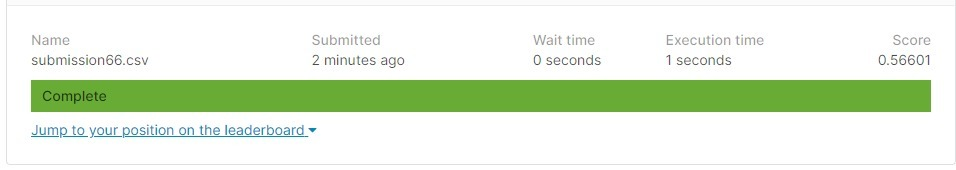

This requires more investigation.

# Phase 3: Selected Model

For Phase 3 we found that the best model from our experiments and hyperparameter tuning was a multilayer perceptron with the following hyperparameters:  
    -Hidden layers: (16,4)  
    -Activation: logistic  
    -Optimizer: ADAM
    -Learning Rate: 0.0001  

In [0]:
#Split Target and Training Data
y = X_kaggle_train['TARGET']
X = X_kaggle_train.drop(['TARGET'], axis = 1)

In [0]:
#Setup attributes for pipeline
num_attribs = X.select_dtypes(exclude='object').columns
cat_attribs = X.select_dtypes(include='object').columns

In [0]:
last_pipe = Pipeline([
    ('Data_prep', data_prep_pipeline),
    ("NN", MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes=(16,4), activation='logistic', learning_rate_init=0.0001, random_state=1))
    ])

# Kaggle Submission file prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [0]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [0]:
test_class_scores[0:10]

array([0.03686227, 0.11282429, 0.05011617, 0.03948623, 0.11808136,
       0.06727338, 0.02232402, 0.07406108, 0.01847286, 0.0951299 ])

In [0]:
# Submission dataframe
submit_df = X_kaggle_test[['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.036862
1,100005,0.112824
2,100013,0.050116
3,100028,0.039486
4,100038,0.118081


In [0]:
submit_df.to_csv("submission_phase2.csv",index=False)

## Kaggle submission via the command line API

In [0]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|███████████████████████████████████████| 1.26M/1.26M [00:01<00:00, 986kB/s]
Successfully submitted to Home Credit Default Risk

### Report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

### Phase 1 Kaggle Submission

![alt text](https://i.imgur.com/9Ol7Ngf.png)

### Phase 2 Kaggle Submission

![alt text](https://i.imgur.com/omrYAON.png)

### Phase 3 Kaggle Submission

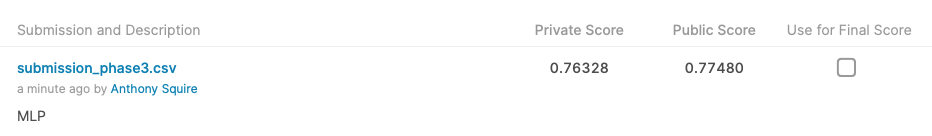

# Write-up 

See Attached file Group9_Phase3_Report

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)
